# basic progressive fitting (1 distance) and spatial tolerance function fitting (multiple distances)
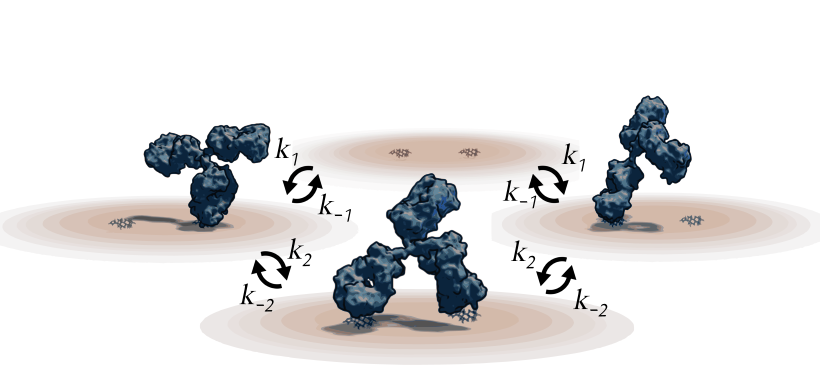

1. introduce new june data from original paper
2. structure binding correction introduced and smart bounds placed on normalization factor
3. strict check of units
4. apparent KD fitting and RU based fitting to compare with Alan's original biacore results

$A \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} B$; 


In [18]:
%matplotlib inline
import numpy as np
import fitting_lib_1_3 as mk
import os
import imp
import scipy.optimize as opt
import ipdb
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from scipy import stats
import matplotlib.cm as cm
from IPython.display import display, Markdown
import sympy
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.rcParams.update({'font.size': 25})



In [2]:
### USER PARAMETERS ###
master_name = "iggdig_structnorm_apparentkd"

mono_data_source = "iggdig_mono"

run_list_biv = np.array([    
    ['iggdig_204nm', 'bivalent_close', 2.04],
    ['iggdig_244nm', 'bivalent_close', 2.44],
    ['iggdig_3nm', 'bivalent_close', 3],
    ['iggdig_7nm', 'bivalent_close', 7],
    ['iggdig_14nm1', 'bivalent_close', 14],
    ['iggdig_14nm2', 'bivalent_close', 14],
    ['iggdig_16nm', 'bivalent_close', 16],
    ['iggdig_17nm', 'bivalent_close', 17],
    ['iggdig_21nm1', 'bivalent_close', 21],
    ['iggdig_21nm2', 'bivalent_close', 21],
    ['iggdig_21nm3', 'bivalent_close', 21],
    ['iggdig_28nm1', 'bivalent_close', 28],
    ['iggdig_28nm2', 'bivalent_close', 28],
    ['iggdig_42nm1', 'bivalent_close', 42],
    ['iggdig_42nm2', 'bivalent_close', 42],
    ['iggdig_84nm', 'bivalent_close', 84],
    ['iggdig_99nm', 'bivalent_close', 99],
])

bivalent_data_source = run_list_biv[5]

RstrRmax_slope = 0.0212 # RUab/RUstr
RstrRmax_interc = 0 # RU

In [3]:
def apparent_KD(concentration, KD1, KD2):
    K_Dapp = (-1*KD2*(concentration**2-KD1**2))/(2*concentration*KD2 + KD1 + 2*KD1*KD2)
    return K_Dapp

In [16]:
### get R_struct and suggested Rmax for each item ###

## progressive fitting for IgG1 dig - basic case

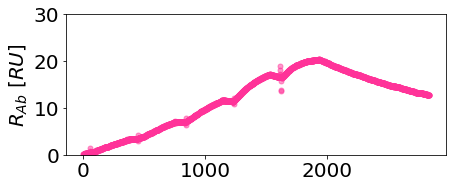

<Figure size 432x288 with 0 Axes>

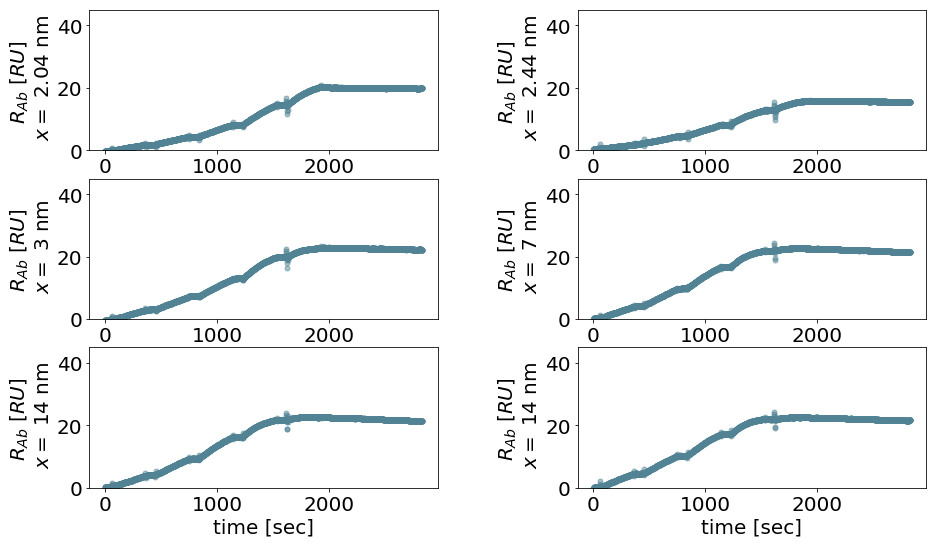

<Figure size 432x288 with 0 Axes>

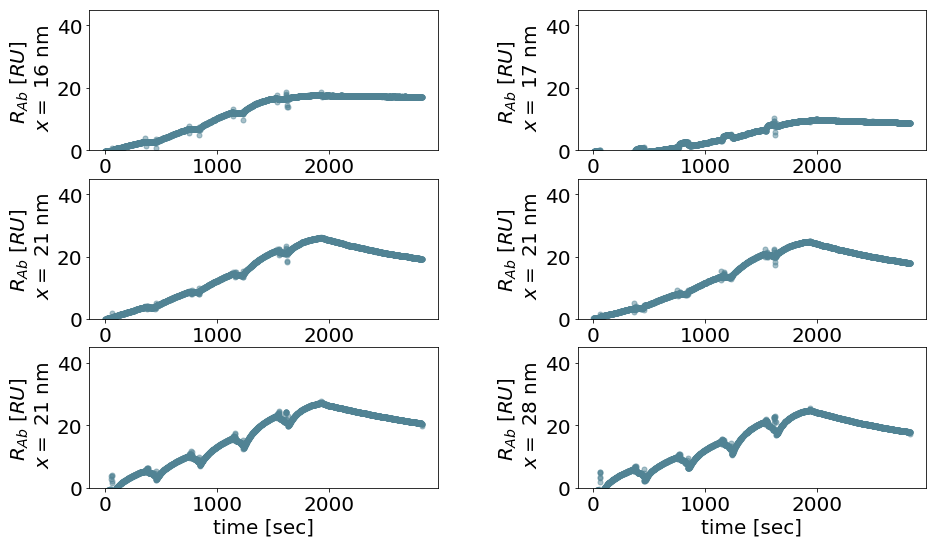

<Figure size 432x288 with 0 Axes>

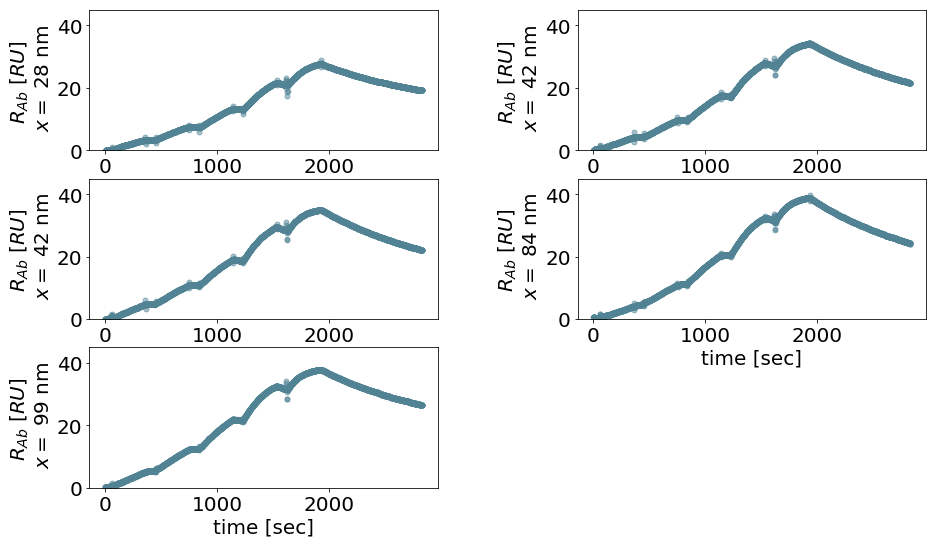

In [17]:
output_directory = master_name+"/OUTPUT_rawsprplots"  # save spr plots into a raw spr plot directory
if not os.path.exists(output_directory):
            os.makedirs(output_directory)

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rcParams.update({'font.size': 20})        
        
plt.figure(figsize=(15,15))
mono_run = list(pd.read_csv('data_directory/august_2018_iggdig_data/'+mono_data_source+".txt", sep="\t", header=None)[0])
plt.subplot(521)
plt.scatter(range(0, len(mono_run)), mono_run, alpha = 0.5, s = 25, c = "#ff3399")
plt.ylabel("$R_{Ab}$ $[RU]$")
plt.ylim(0,30)
plt.savefig(output_directory+"/ raw_"+master_name+"_monoplot.svg")
plt.show()

plt.tight_layout()
plt.figure(figsize=(15,15))
left = 0.9  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.1  # the bottom of the subplots of the figure
top = 0.0     # the top of the subplots of the figure
wspace =10  # the amount of width reserved for space between subplots,
hspace = 0.2

### save plots of the bivalent runs of different distances ###
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=None)
for i in range(0,6):
    run_data = list(pd.read_csv('data_directory/august_2018_iggdig_data/'+run_list_biv[i][0]+'.txt', sep="\t", header=None)[0])
    plotnum = 521+i
    plt.subplot(plotnum)
    plt.scatter(range(0, len(run_data)), run_data, alpha = 0.5, s = 25, c = "#518394")
    plt.ylabel("$R_{Ab}$ $[RU]$ \n $x = $ %s"% run_list_biv[i][2] + " nm")
    plt.xlabel("time [sec]")
    plt.ylim(0,45)

plt.savefig(output_directory+"/ raw_"+master_name+"_distanceplots1.svg")
plt.show()
plt.close()

plt.tight_layout()
plt.figure(figsize=(15,15))
left = 0.9  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.1  # the bottom of the subplots of the figure
top = 0.0     # the top of the subplots of the figure
wspace =10  # the amount of width reserved for space between subplots,
hspace = 0.2

### save plots of the bivalent runs of different distances ###
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=None)
for i in range(6,12):
    run_data = list(pd.read_csv('data_directory/august_2018_iggdig_data/'+run_list_biv[i][0]+'.txt', sep="\t", header=None)[0])
    plotnum = 521+i-6
    plt.subplot(plotnum)
    plt.scatter(range(0, len(run_data)), run_data, alpha = 0.5, s = 25, c = "#518394")
    plt.ylabel("$R_{Ab}$ $[RU]$ \n $x = $ %s"% run_list_biv[i][2] + " nm")
    plt.xlabel("time [sec]")
    plt.ylim(0,45)

plt.savefig(output_directory+"/ raw_"+master_name+"_distanceplots2.svg")
plt.show()
plt.close()
plt.tight_layout()
plt.figure(figsize=(15,15))
left = 0.9  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.1  # the bottom of the subplots of the figure
top = 0.0     # the top of the subplots of the figure
wspace =10  # the amount of width reserved for space between subplots,
hspace = 0.2
### save plots of the bivalent runs of different distances ###
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=None)
for i in range(12,len(run_list_biv)):
    run_data = list(pd.read_csv('data_directory/august_2018_iggdig_data/'+run_list_biv[i][0]+'.txt', sep="\t", header=None)[0])
    plotnum = 521+i-12
    plt.subplot(plotnum)
    plt.scatter(range(0, len(run_data)), run_data, alpha = 0.5, s = 25, c = "#518394")
    plt.ylabel("$R_{Ab}$ $[RU]$ \n $x = $ %s"% run_list_biv[i][2] + " nm")
    plt.xlabel("time [sec]")
    plt.ylim(0,45)

plt.savefig(output_directory+"/ raw_"+master_name+"_distanceplots2.svg")
plt.show()
plt.close()

### getting the initial guess for the monovalent rates

('K_D1_guess = ', 4.181242200292052e-11)


<Figure size 432x288 with 0 Axes>

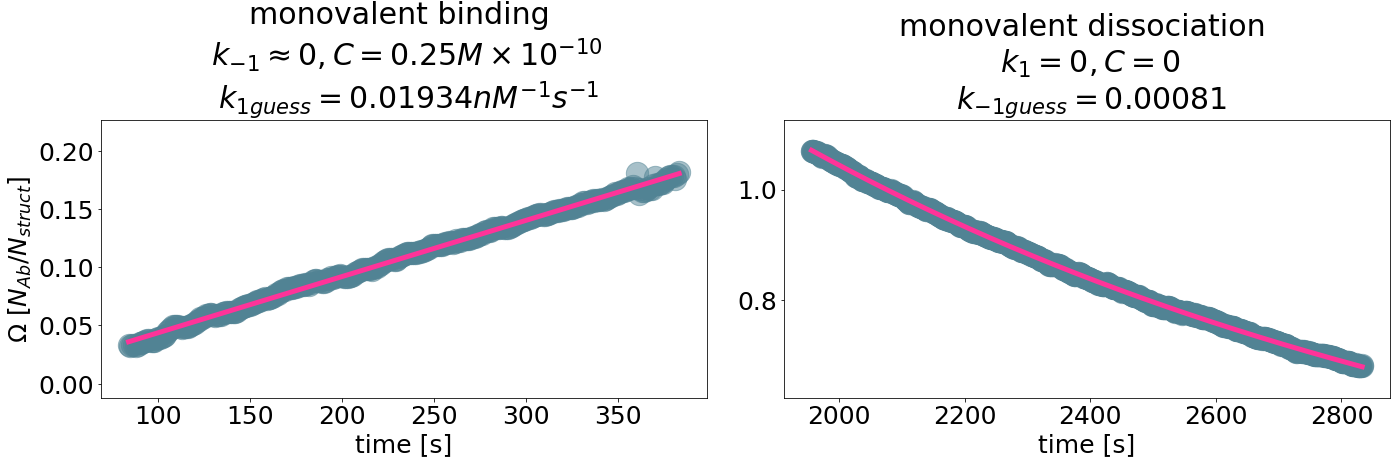

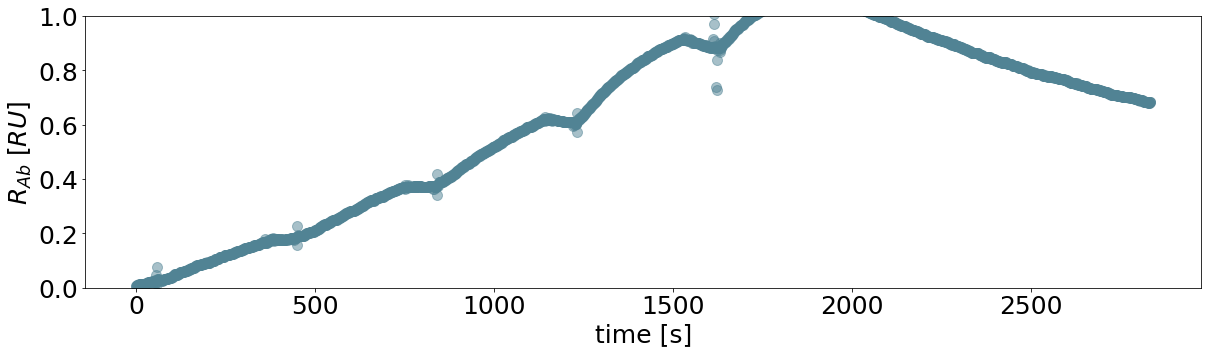

$${\huge K_{D1,guess}=4.181242200292052e-11M \huge}$$

In [6]:
imp.reload(mk)
output_directory = master_name+"/OUTPUT_monovalent_fitting"
if not os.path.exists(output_directory):
            os.makedirs(output_directory)
if not os.path.exists(master_name+"/pickle_directory"):
            os.makedirs(master_name+"/pickle_directory")
        
scaling_constant = mk.get_Rmax(struct_file_path = 'data_directory/august_2018_iggdig_data/' + mono_data_source+"_struct.txt", 
                            RstrRmax_slope=RstrRmax_slope, 
                            RstrRmax_interc=RstrRmax_interc)
time_points = np.array([0, 84, 384, 475, 775, 866, 1166, 1257, 1557, 1656, 1956])
concentrations = np.array([0, 0.025, 0, 0.05, 0, 0.1, 0, .25, 0, .5, 0]) # nM e-9

### in RU fitting, no normalization done here yet ###
run_data_raw = mk.fetch_data_raw('data_directory/august_2018_iggdig_data/' + mono_data_source+".txt")
### normalize here now with the Rstruct value Rmax relationship measured preivously
run_data_mono = run_data_raw /  scaling_constant
t1 = np.arange(time_points[1], time_points[2])
t2 = np.arange(time_points[-1], len(run_data_mono))


run_data1 = run_data_mono[time_points[1]:time_points[2]]
run_data2 = run_data_mono[time_points[-1]:]


k_on_g, k_off_g = mk.avg_slope_guess(time_points, concentrations,run_data_mono)
k1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(t1[0:300], run_data1[0:300])
# import pdb; pdb.set_trace()
popt, pcov = opt.curve_fit(mk.exponential_decay_fit, t2, run_data2,p0=(1, 1e-6, 1), maxfev=1000000)
KD1_guess = k_off_g / (k_on_g*10**9)
print("K_D1_guess = ", KD1_guess)

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.rcParams.update({'font.size': 25})

plt.tight_layout()

plt.figure(figsize=(20,7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.78, wspace=.1, hspace=None)
plt.subplot(121)
plt.scatter(t1,run_data1, alpha = 0.5, s = 500, c = "#518394")
plt.plot(t1,t1*k1+intercept1,c="#ff3399", linewidth=5)
plt.title("monovalent binding \n $k_{-1} \\approx 0, C = 0.25 M \\times 10 ^{-10}$ \n $k_{1 guess} = $"+str(np.round(k_on_g,5))+"$nM^{-1}s^{-1}$")
plt.ylabel("$\\Omega$ $[N_{Ab}/N_{struct}]$")
plt.xlabel("time [s]")
plt.subplot(122)
plt.scatter(t2,run_data2, alpha = 0.5, s = 500, c = "#518394")
plt.plot(t2,mk.exponential_decay_fit(t2,popt[0],popt[1],popt[2]),c="#ff3399", linewidth=5)
plt.title("monovalent dissociation \n $k_{1} = 0, C = 0$ \n $k_{-1 guess} = $"+str(np.round(np.abs(k_off_g),5)))
plt.xlabel("time [s]")

plt.savefig(output_directory+"/monovalent_guess.svg")

plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(20,5))
plt.scatter(range(0,len(run_data_mono)), run_data_mono, alpha = 0.5, s = 100, c = "#518394")
plt.ylim(0,1)

plt.ylabel("$R_{Ab}$ $[RU]$")
plt.xlabel("time [s]")
plt.savefig(output_directory+"/monovalent_spr_curve_.svg")
plt.show()
plt.close()

import pickle as pkl
pkl.dump([scaling_constant, time_points,  concentrations, run_data_mono, run_list_biv,
          t1, t2, run_data1,run_data2,
          k_on_g, k_off_g,k1, intercept1, r_value1, p_value1, std_err1,popt, pcov,KD1_guess          
         ], open(master_name+'/pickle_directory/guess_on_rates.pickle', 'wb'))

display(Markdown("$${\huge K_{D1,guess}="+str(KD1_guess)+"M \huge}$$"))

[0. 0. 0. ... 0. 0. 0.]
0.09795270031768444


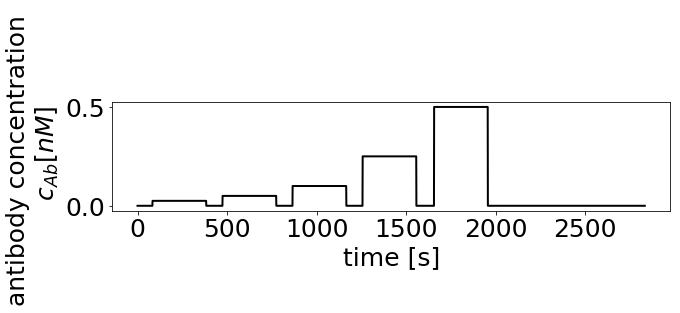

In [7]:
time_points
weighted_concs = np.zeros((len(run_data)))
timepoints_new = list(time_points) + [len(run_data)]
for i in range(0, len(time_points)):
#     print i
#     print timepoints_new[i+1]
    for j in range(timepoints_new[i],timepoints_new[i+1]):
        weighted_concs[j] = concentrations[i]
print(weighted_concs)   
fixed_conc = np.average(weighted_concs)
print(fixed_conc)
plt.figure(figsize=(10, 2))
plt.plot(weighted_concs,c="k", linewidth=2)
plt.ylabel("antibody concentration \n $c_{Ab} [nM]$",fontsize=25)
plt.xlabel("time [s]",fontsize=25)
plt.savefig(output_directory+"/concentration_injections.svg")
plt.show()
plt.close()

In [8]:
import pickle as pkl
scaling_constant, time_points,  concentrations, \
run_data_mono,run_list_biv, t1, t2, run_data1,run_data2,k_on_g, \
k_off_g,k1, intercept1, r_value1, p_value1, std_err1,popt, pcov,KD1_guess = \
    pkl.load(open(master_name+'/pickle_directory/guess_on_rates.pickle', 'rb'))

## monovalent fine fit - simulated annealing

('(fit_annealing) variable parameter: ', array([1.93367912e-02, 8.08518076e-04, 1.87431249e+01]), 'log10 variable parameter: ', array([-1.71361559, -3.09231027,  1.272842  ]))
basinhopping step 0: f 21.2201
basinhopping step 1: f 21.2201 trial_f 21.2201 accepted 1  lowest_f 21.2201
found new global minimum on step 1 with function value 21.2201
('iggdig_mono', [-1.6710897652090932, -3.275131706139956, 1.3230809604378209])


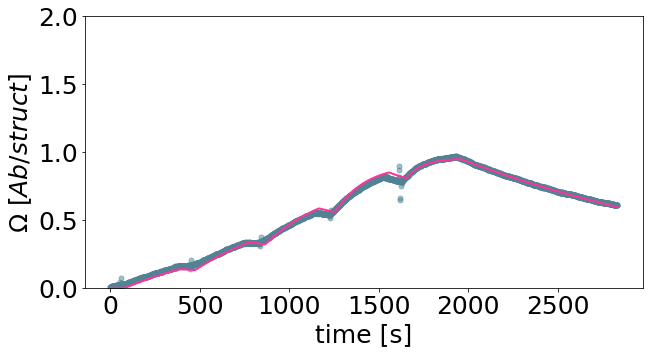

[2.13260408e-02 5.30723470e-04 2.10417066e+01]


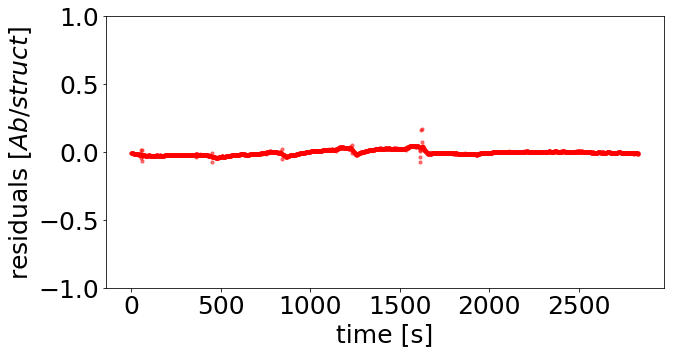

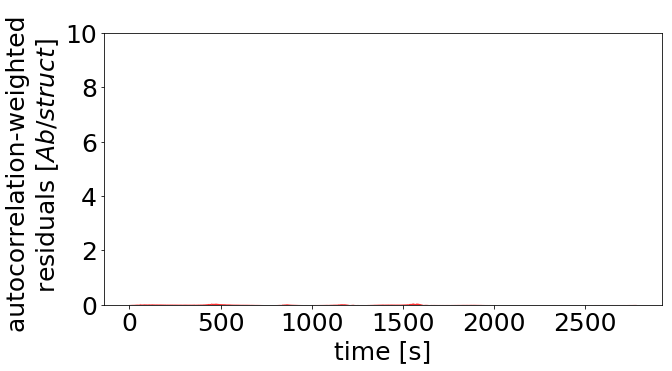

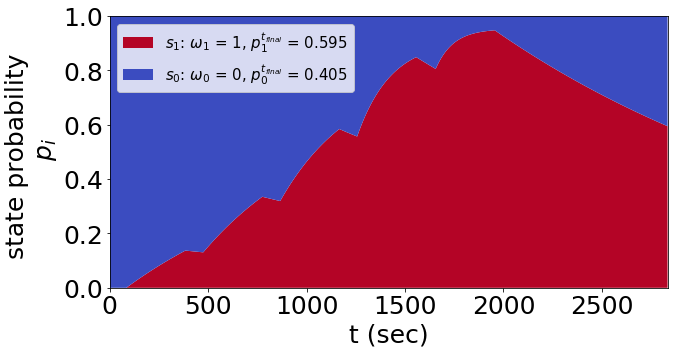

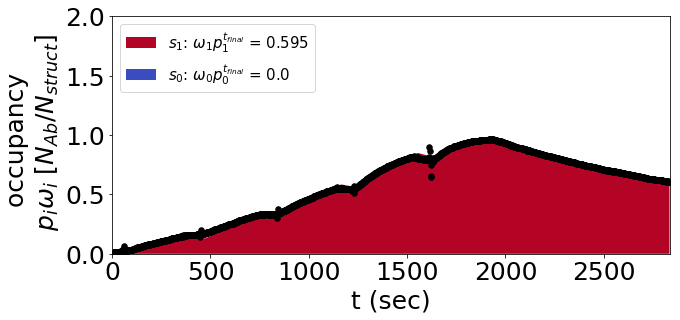

[array([-1.67108977, -3.27513171,  1.32308096])]


$${\huge K_{D1,fine}=2.488616974559729e-11M \huge}$$

('kon, koff:', 21326040.75318835, 0.0005307234701853708)


In [9]:
imp.reload(mk)

k_on_g, k_off_g = k_on_g, k_off_g
origami_1 = mk.Fitting(run_list = np.array([[mono_data_source,"monovalent"]]), 
                       run_type = "mono",
                       mono_rates = np.array([k_on_g, k_off_g]),
                       KD_biv = None,
                       concentrations = concentrations,
                       time_points = time_points, 
                       scaling_constant = None,
                      output_dir = master_name+"/monovalent_fine_fitting",
                      struct_params = ['data_directory/august_2018_iggdig_data/',RstrRmax_slope, RstrRmax_interc],
                      data_dir ='data_directory/august_2018_iggdig_data/' )
origami_1.set_bounds(((-12,2),(-12,2),(np.log10(18),np.log10(20))))
origami_1.print_graph = False
xopt_compilation = np.power(10,origami_1.fit_annealing())
k_on, k_off, norm1 = xopt_compilation[0][0], xopt_compilation[0][1], xopt_compilation[0][2]

KD1 = k_off /(k_on*10**9) # M
pkl.dump([xopt_compilation, 
          k_on, k_off, norm1,origami_1 ,KD1         
         ], open(master_name+'/pickle_directory/monovalent_fine_fitting_result.pickle', 'wb'))

display(Markdown("$${\huge K_{D1,fine}="+str(KD1)+"M \huge}$$"))
print("kon, koff:",k_on*10**9, k_off)


In [10]:
import pickle as pkl
xopt_compilation, \
          k_on, k_off, norm1,origami_1,KD1 = \
    pkl.load(open(master_name+'/pickle_directory/monovalent_fine_fitting_result.pickle', 'rb'))

[0.00142102 0.00084685 0.03916   ]

## bivalent fit

(0.001689336284608581, 0.000600366057061402, 17.904803732090443)

('(fit_annealing) variable parameter: ', array([ 1.        ,  1.        , 18.35676074]), 'log10 variable parameter: ', array([0.        , 0.        , 1.26379605]))
basinhopping step 0: f 100.807
basinhopping step 1: f 100.807 trial_f 100.807 accepted 1  lowest_f 100.807
('iggdig_14nm2', [-1.592965128193447, -2.9305014287929505, 1.2782607788619553])


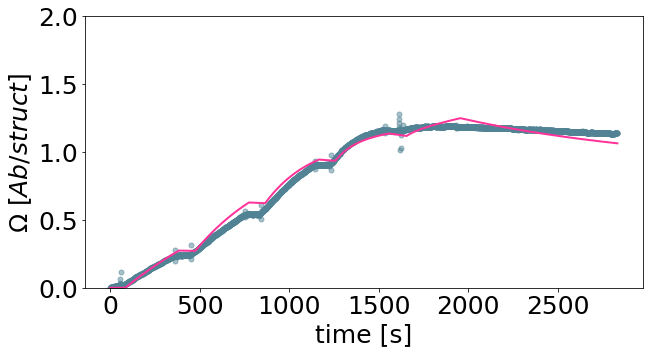

[2.55290628e-02 1.17354182e-03 1.89784517e+01]


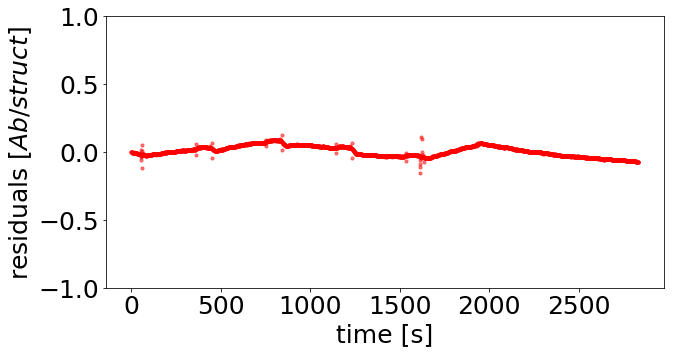

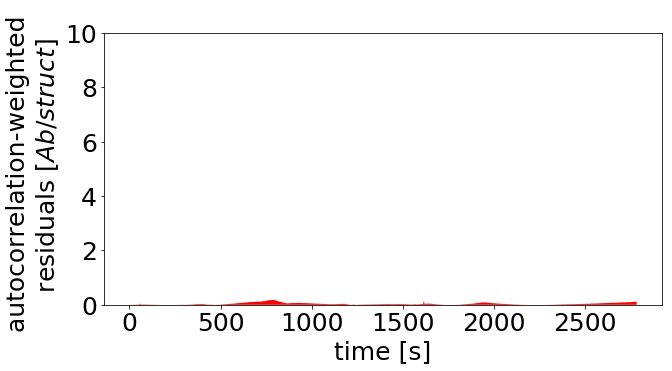

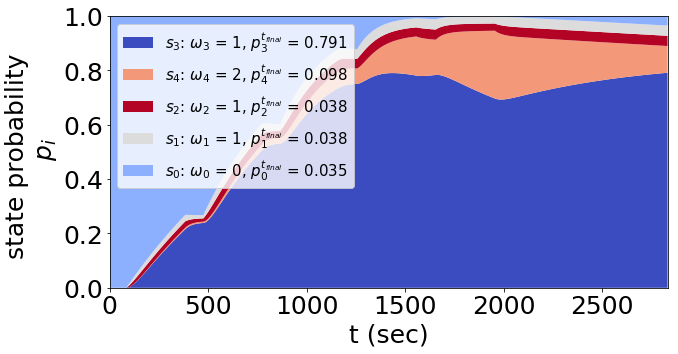

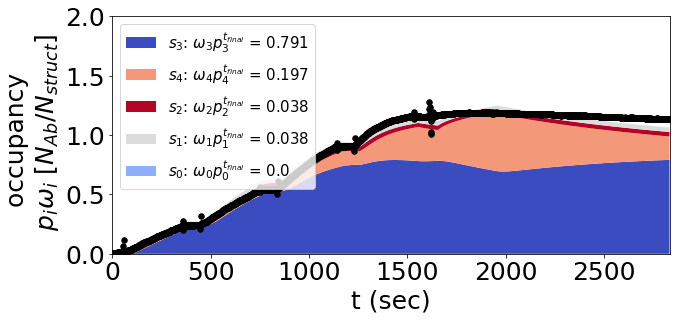

[array([-1.59296513, -2.93050143,  1.27826078])]


$${\large K_{D2}=0.045968856375561924\large}$$

$${\large K_{Dapp} = -8.49697410406142e-12\large}$$

In [11]:
imp.reload(mk)

origami_2 = mk.Fitting(
    run_list = np.array([bivalent_data_source]), 
    run_type = "biv_3param", 
    mono_rates = np.array([k_on, k_off]),
    KD_biv = .01, 
    concentrations = concentrations, 
    time_points = time_points, 
    scaling_constant = None,
    output_dir = master_name+"/bivalent_fine_fitting",
      struct_params = ['data_directory/august_2018_iggdig_data/',RstrRmax_slope, RstrRmax_interc],
      data_dir ='data_directory/august_2018_iggdig_data/' ,
    k_monobiv = 1,
    k_bivmono = 1,)
# origami_2.set_bounds(((-9,9),(np.log10(17),np.log10(20))))
origami_2.set_bounds(((-6,2),(-6,2),(np.log10(17),np.log10(20))))
origami_2.print_graph = False
xopt_compilation_2 = origami_2.fit_annealing()
xopt_pow = np.power(10,xopt_compilation_2)
# KD_biv, norm_2 = xopt_pow[0][0], xopt_pow[0][1]
# logKD_biv, lognorm_2 =xopt_compilation_2[0][0], xopt_compilation_2[0][1]
KD_biv, norm_2 = xopt_pow[0][1]/xopt_pow[0][0], xopt_pow[0][2]
logKD_biv, lognorm_2 =xopt_compilation_2[0][1]/xopt_compilation_2[0][0], xopt_compilation_2[0][1]

pkl.dump([xopt_compilation_2, 
          origami_2, KD_biv, norm_2, xopt_pow,  logKD_biv     , lognorm_2  
         ], open(master_name+'/pickle_directory/bivalent_fitting_result.pickle', 'wb'))

Kdapp = apparent_KD(np.average(concentrations)*10**-9,KD1, KD_biv)
display(Markdown("$${\large K_{D2}="+str(KD_biv)+"\large}$$"))
display(Markdown("$${\large K_{Dapp} = "+str(Kdapp)+"\large}$$"))


In [12]:
# import pickle as pkl
xopt_compilation_2, origami_2, KD_biv, norm_2, xopt_pow,  logKD_biv, lognorm_2 = \
    pkl.load(open(master_name+'/pickle_directory/bivalent_fitting_result.pickle', 'rb'))

# Alpha function fitting - with K_D

('(fit_annealing) variable parameter: ', array([ 0.06254085, 15.30224249]), 'log10 variable parameter: ', array([-1.20383624,  1.18475508]))
basinhopping step 0: f 3084.38
basinhopping step 1: f 3084.38 trial_f 3084.38 accepted 1  lowest_f 3084.38
('iggdig_204nm', [-0.9964580064914687, 1.1472023285421016])


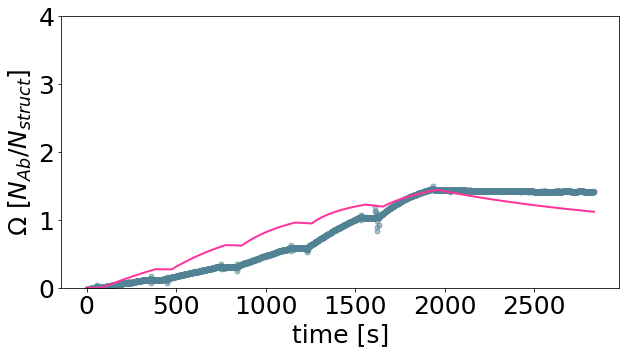

[ 0.10081891 14.03467398]


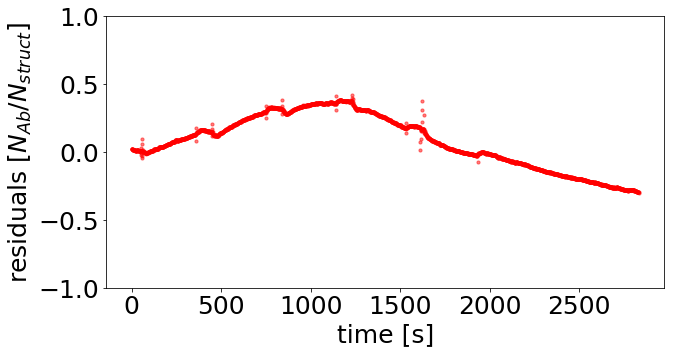

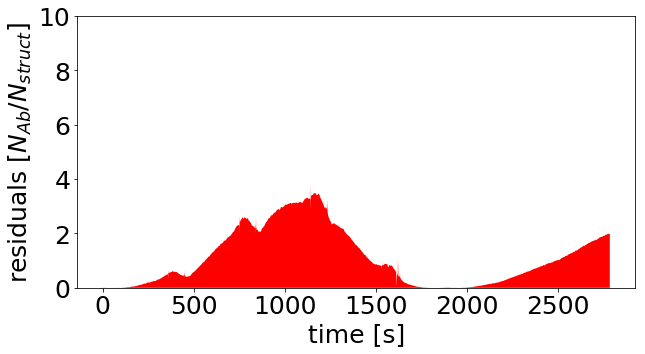

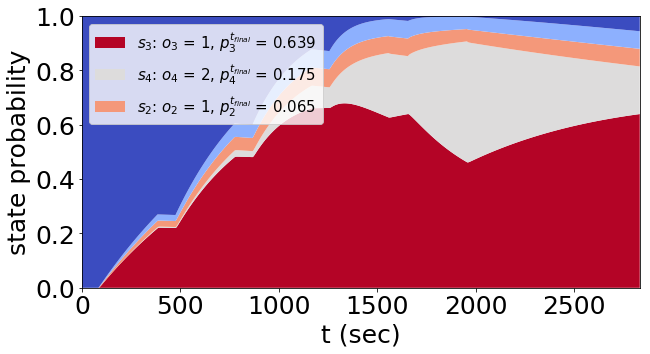

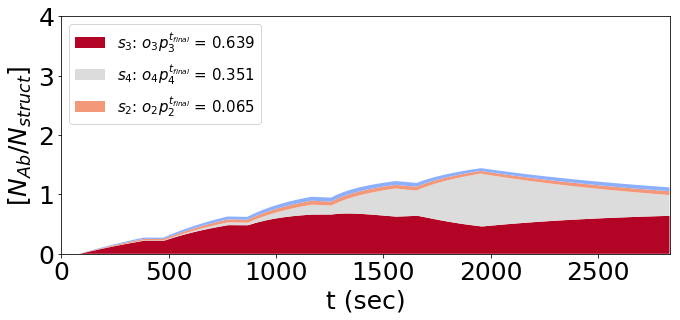

('(fit_annealing) variable parameter: ', array([ 0.06254085, 11.87632466]), 'log10 variable parameter: ', array([-1.20383624,  1.07468206]))
basinhopping step 0: f 1319.1
basinhopping step 1: f 1319.1 trial_f 1319.1 accepted 1  lowest_f 1319.1
('iggdig_244nm', [-0.9023159155048179, 1.046226284602857])


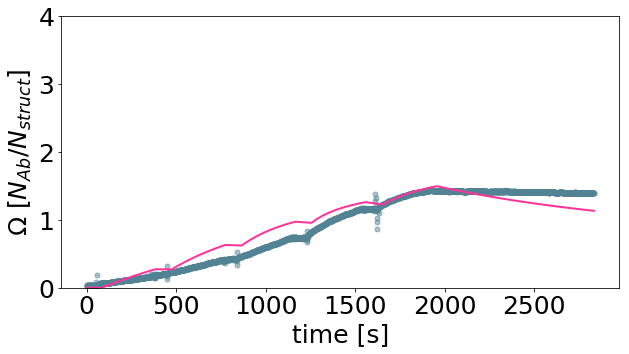

[ 0.12522299 11.12311134]


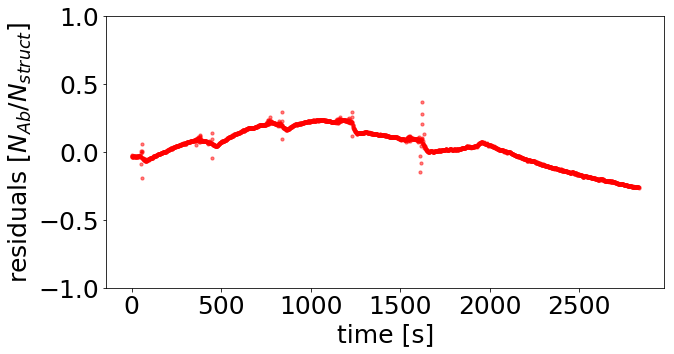

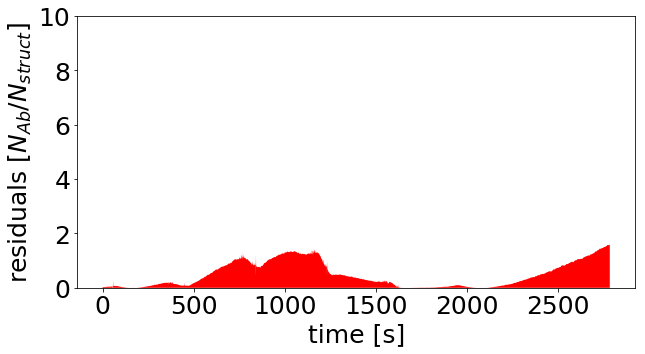

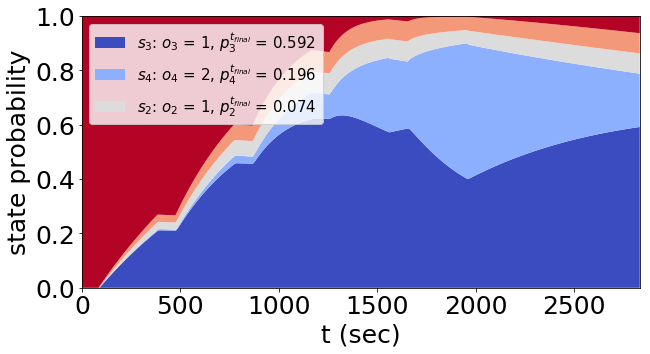

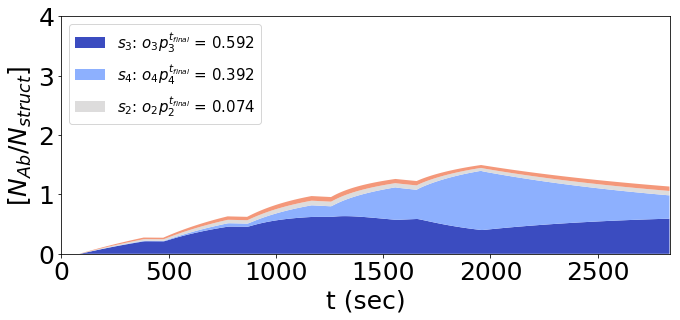

('(fit_annealing) variable parameter: ', array([ 0.06254085, 16.26006436]), 'log10 variable parameter: ', array([-1.20383624,  1.21112226]))
basinhopping step 0: f 887.765
basinhopping step 1: f 887.765 trial_f 887.765 accepted 1  lowest_f 887.765
found new global minimum on step 1 with function value 887.765
('iggdig_3nm', [-0.8785094186775054, 1.2090374189699418])


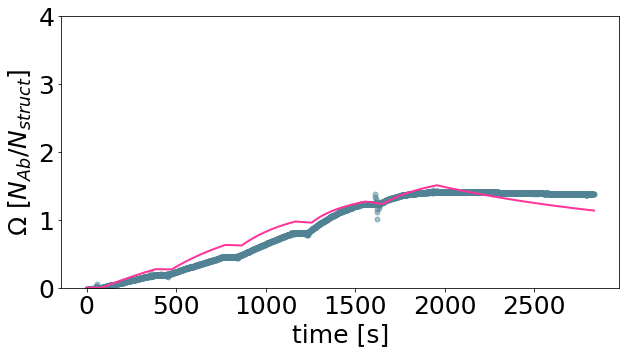

[ 0.1322789  16.18219458]


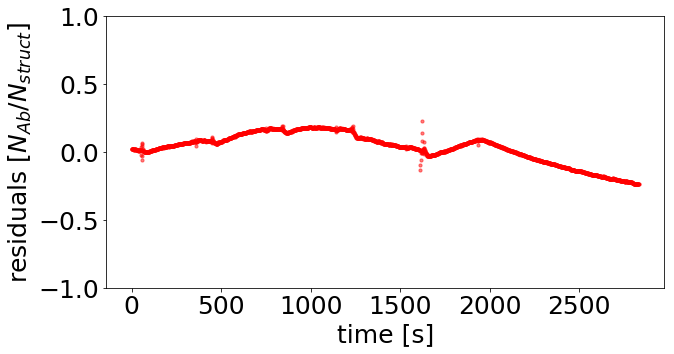

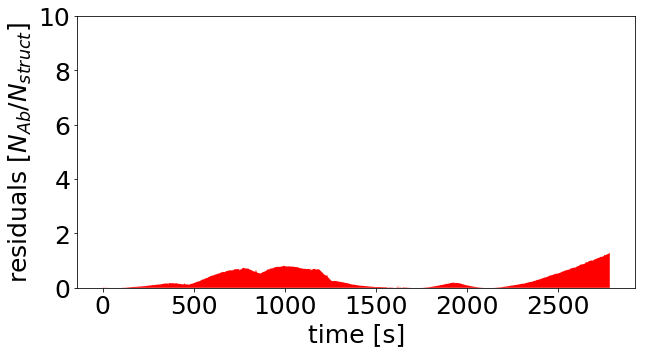

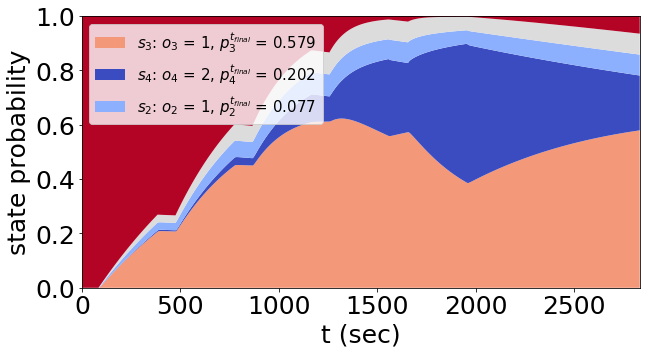

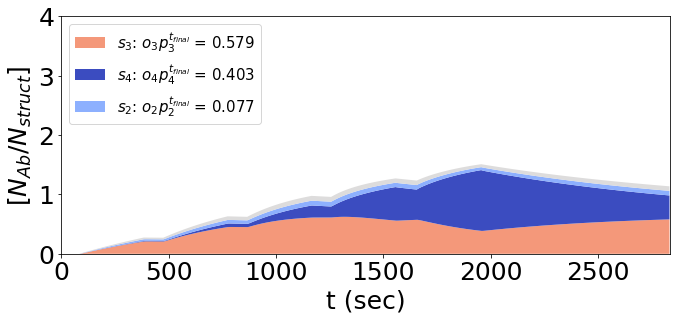

('(fit_annealing) variable parameter: ', array([ 0.06254085, 18.45886189]), 'log10 variable parameter: ', array([-1.20383624,  1.26620492]))
basinhopping step 0: f 151.063
basinhopping step 1: f 151.063 trial_f 151.063 accepted 1  lowest_f 151.063
found new global minimum on step 1 with function value 151.063
('iggdig_7nm', [-1.2824979044522173, 1.2701148942486757])


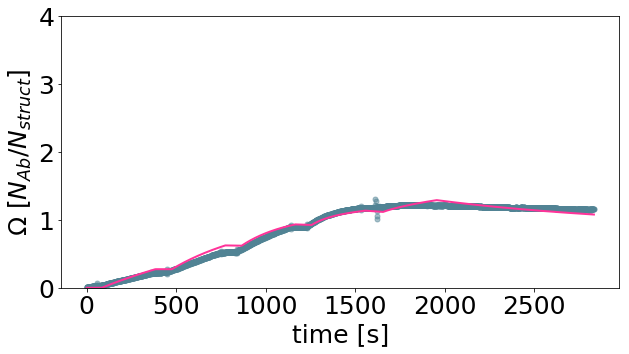

[ 0.05217976 18.62579824]


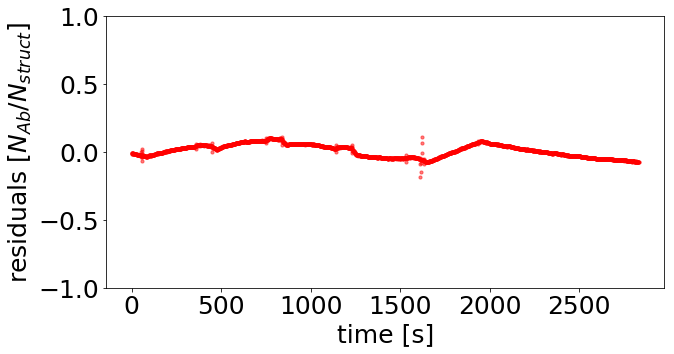

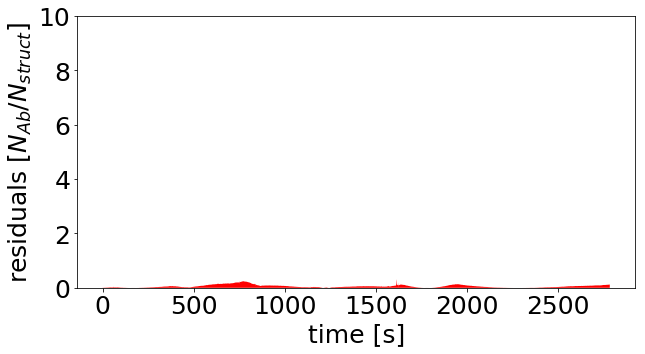

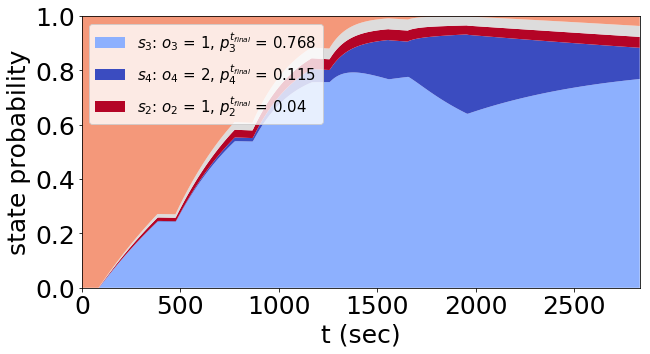

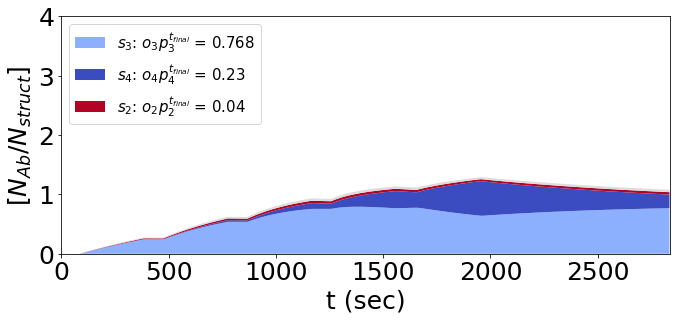

('(fit_annealing) variable parameter: ', array([ 0.06254085, 18.61062847]), 'log10 variable parameter: ', array([-1.20383624,  1.26976104]))
basinhopping step 0: f 189.435
basinhopping step 1: f 189.435 trial_f 189.435 accepted 1  lowest_f 189.435
('iggdig_14nm1', [-1.2038357463181562, 1.2593644137287914])


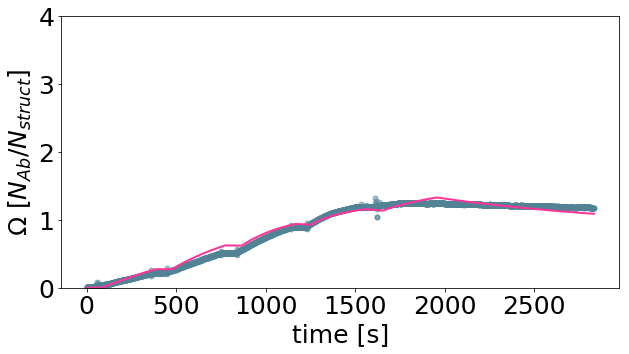

[ 0.06254092 18.1703969 ]


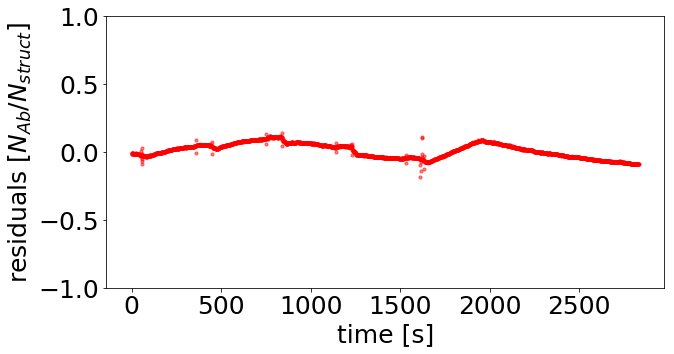

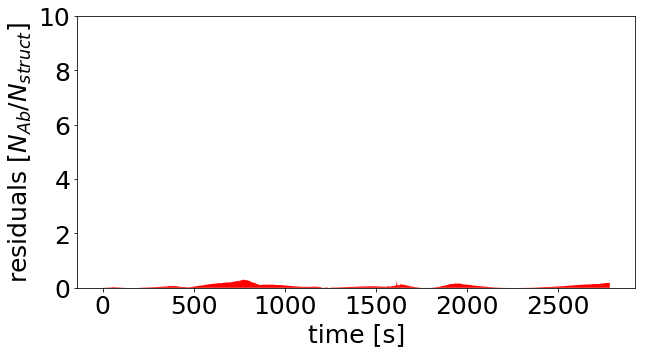

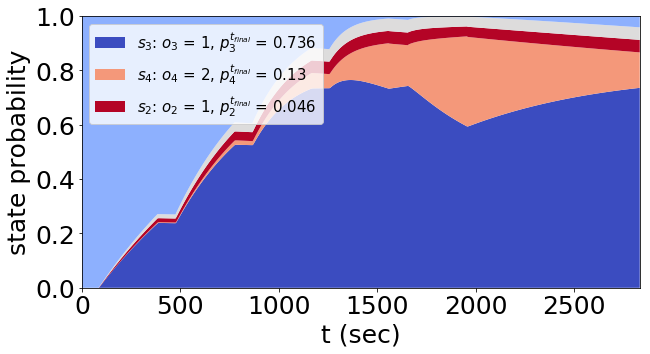

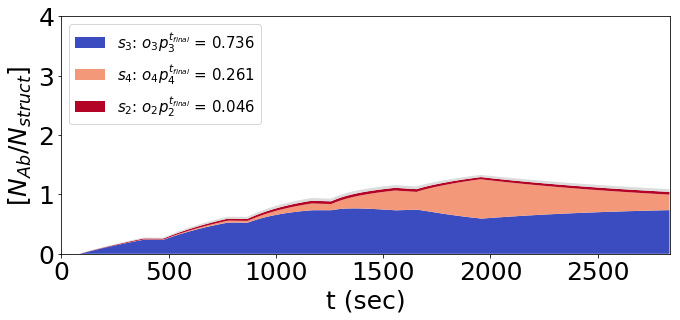

('(fit_annealing) variable parameter: ', array([ 0.06254085, 18.35676074]), 'log10 variable parameter: ', array([-1.20383624,  1.26379605]))
basinhopping step 0: f 103.947
basinhopping step 1: f 103.947 trial_f 103.947 accepted 1  lowest_f 103.947
found new global minimum on step 1 with function value 103.947
('iggdig_14nm2', [-1.4080410423030574, 1.2840588329712308])


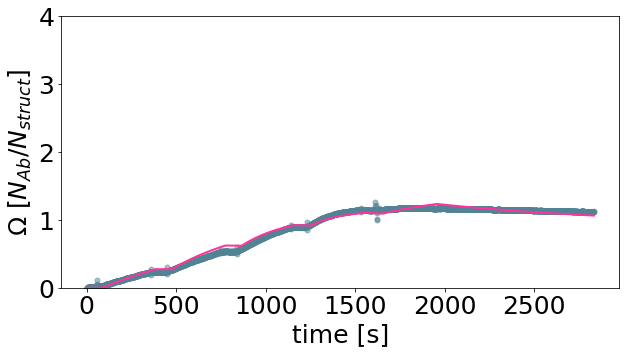

[ 0.0390804  19.23352264]


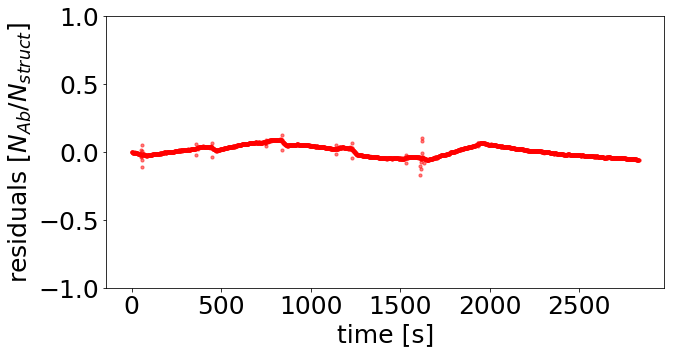

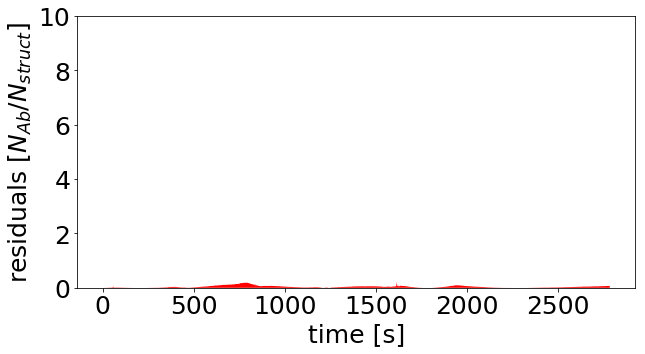

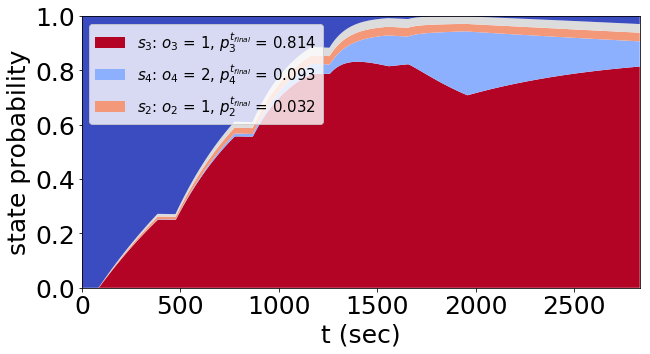

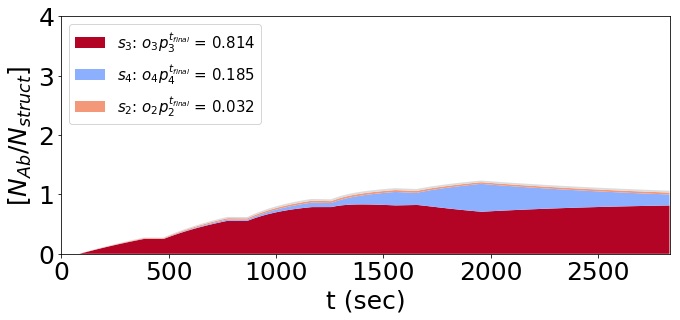

('(fit_annealing) variable parameter: ', array([ 0.06254085, 13.34924751]), 'log10 variable parameter: ', array([-1.20383624,  1.12545679]))
basinhopping step 0: f 289.018
basinhopping step 1: f 289.018 trial_f 289.018 accepted 1  lowest_f 289.018
('iggdig_16nm', [-1.126504487763508, 1.141421972352066])


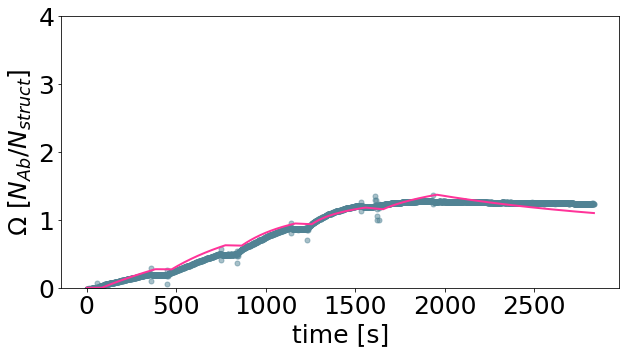

[ 0.07473009 13.84911343]


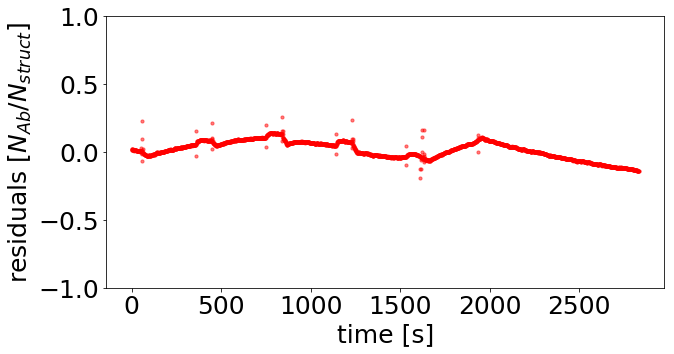

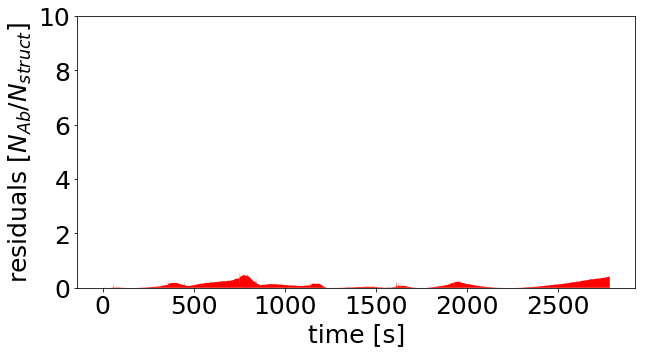

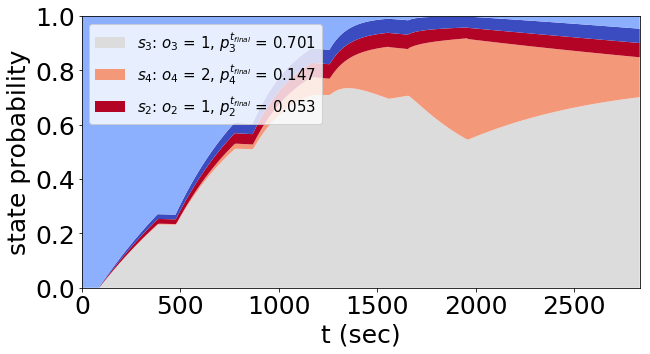

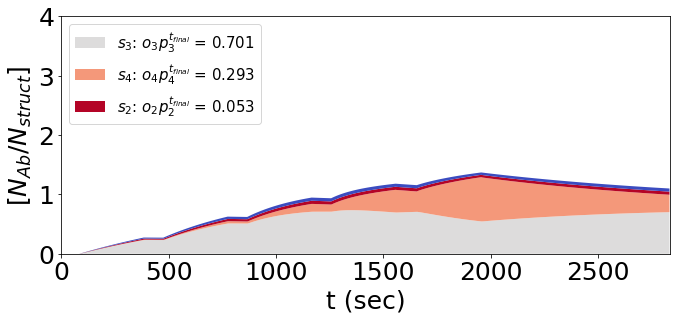

('(fit_annealing) variable parameter: ', array([ 0.06254085, 11.64883606]), 'log10 variable parameter: ', array([-1.20383624,  1.06628253]))
basinhopping step 0: f 4884.58
basinhopping step 1: f 4884.58 trial_f 4884.58 accepted 1  lowest_f 4884.58
('iggdig_17nm', [-1.0611455675844175, 0.8363128772279654])


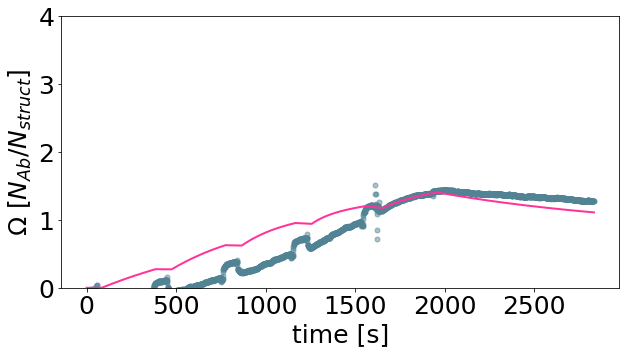

[0.08686692 6.85982248]


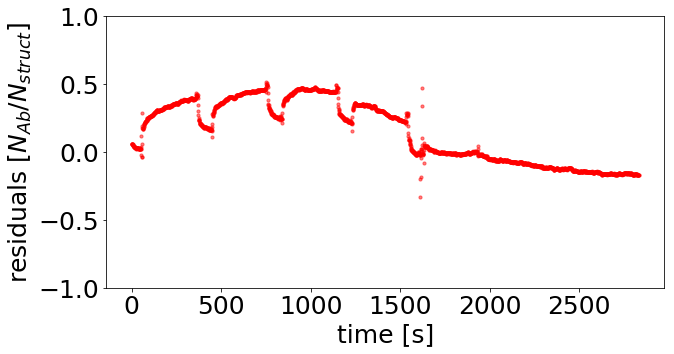

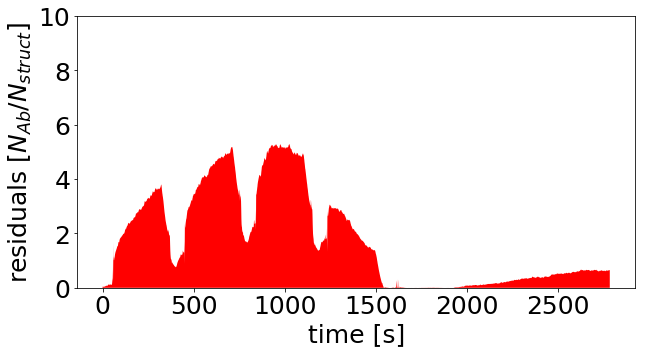

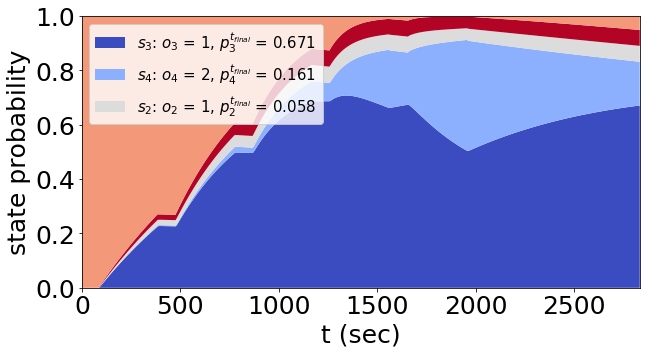

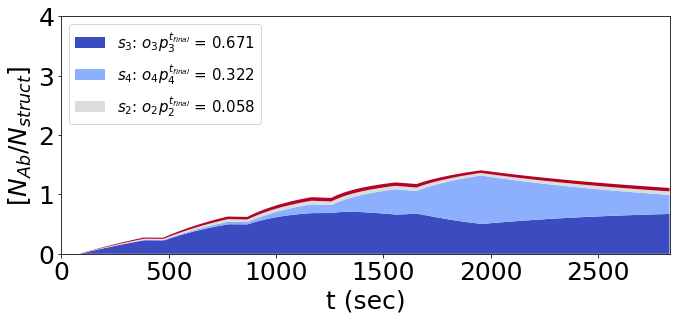

('(fit_annealing) variable parameter: ', array([ 0.06254085, 11.41041798]), 'log10 variable parameter: ', array([-1.20383624,  1.05730155]))
basinhopping step 0: f 98.5692
basinhopping step 1: f 98.5692 trial_f 98.5692 accepted 1  lowest_f 98.5692
found new global minimum on step 1 with function value 98.5692
('iggdig_21nm1', [-0.4426982041589559, 1.1842869850891609])


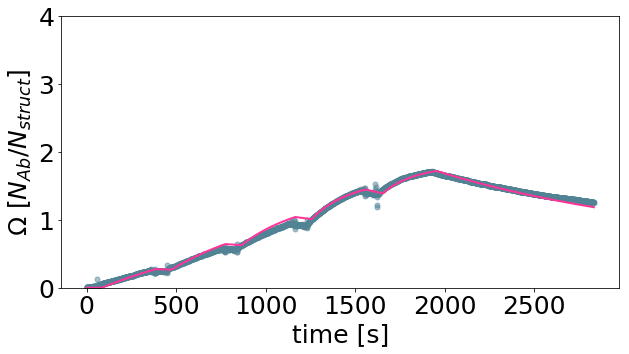

[ 0.3608293  15.28575819]


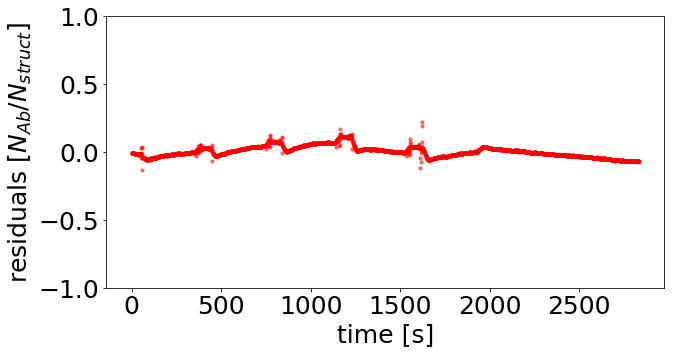

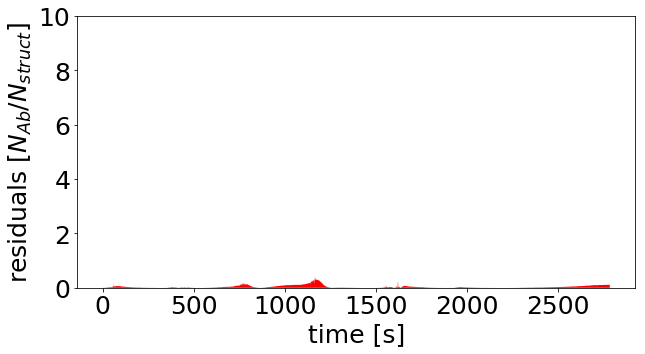

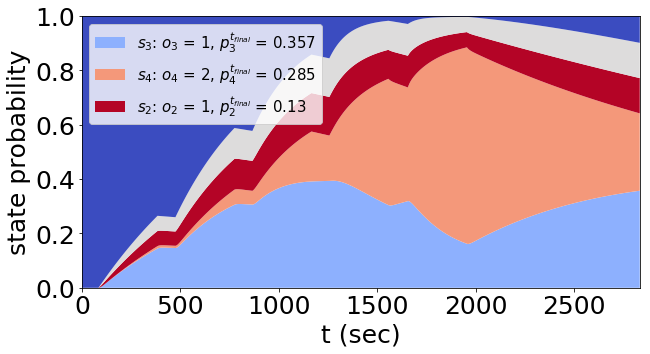

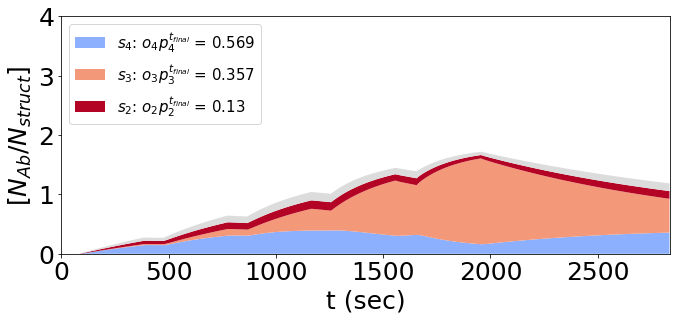

('(fit_annealing) variable parameter: ', array([ 0.06254085, 10.96606837]), 'log10 variable parameter: ', array([-1.20383624,  1.04005095]))
basinhopping step 0: f 93.1066
basinhopping step 1: f 93.1066 trial_f 93.1066 accepted 1  lowest_f 93.1066
found new global minimum on step 1 with function value 93.1066
('iggdig_21nm2', [-0.37412547440834676, 1.156500331180124])


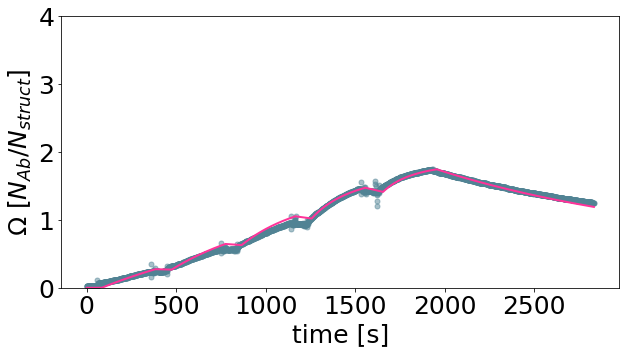

[ 0.42254652 14.33838809]


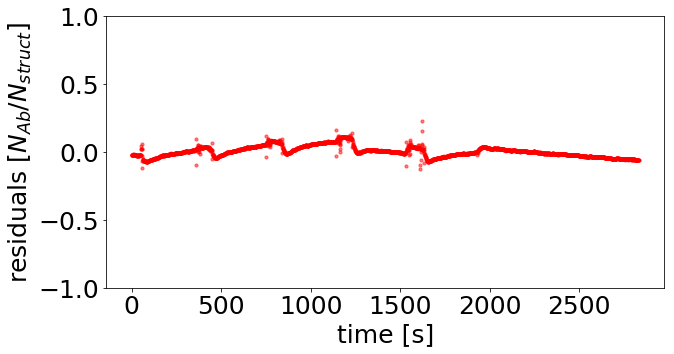

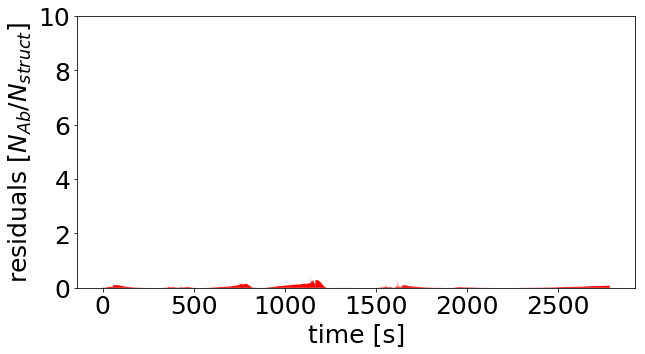

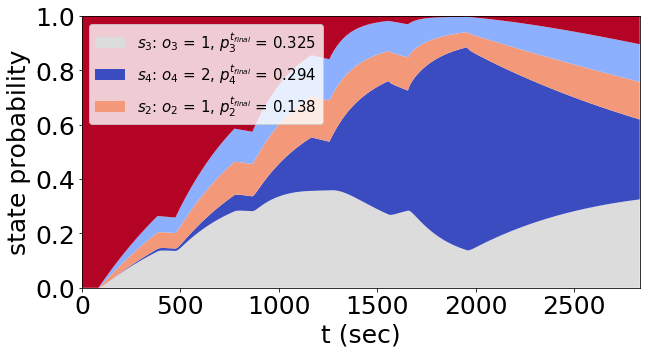

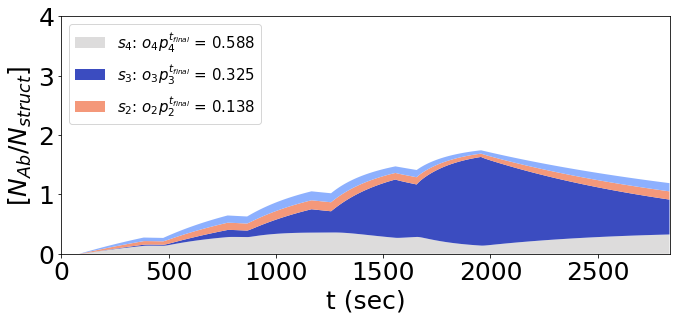

('(fit_annealing) variable parameter: ', array([ 0.06254085, 11.13058962]), 'log10 variable parameter: ', array([-1.20383624,  1.04651817]))
basinhopping step 0: f 185.392
basinhopping step 1: f 185.392 trial_f 185.392 accepted 1  lowest_f 185.392
found new global minimum on step 1 with function value 185.392
('iggdig_21nm3', [-0.6417895967963247, 1.2214295493400253])


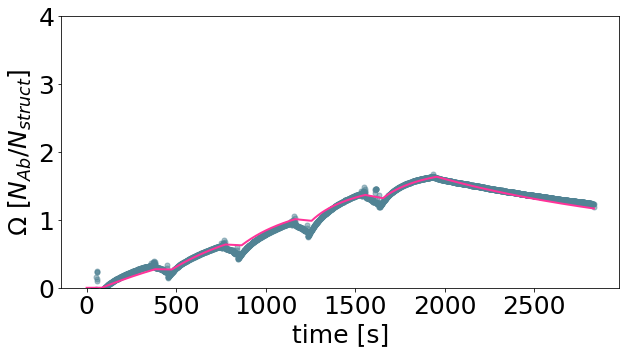

[ 0.22814471 16.65058702]


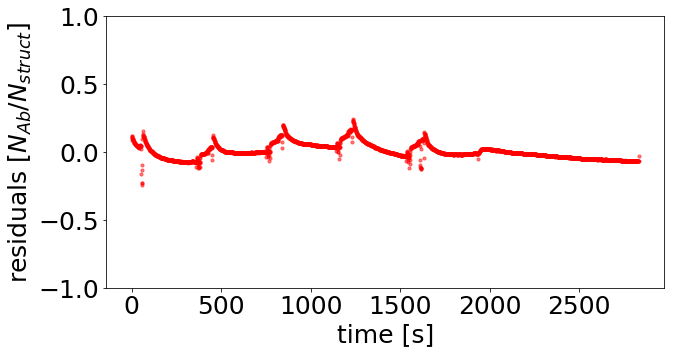

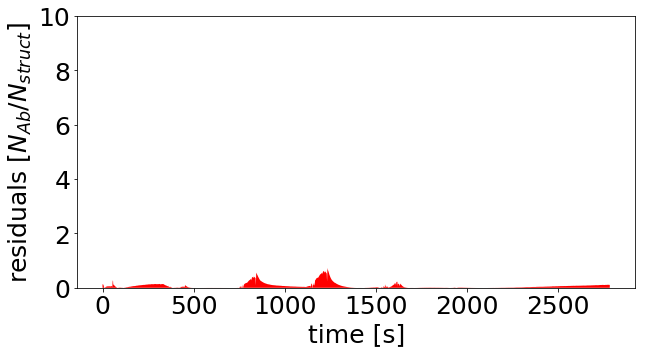

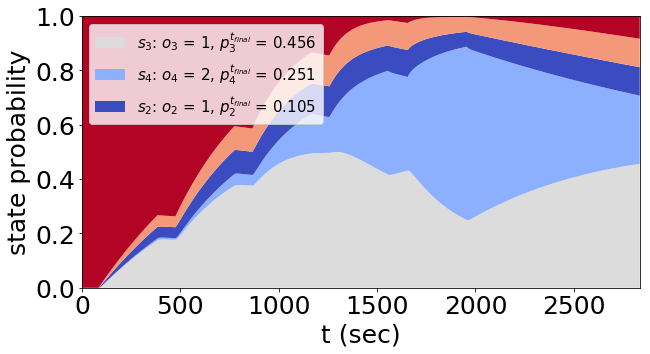

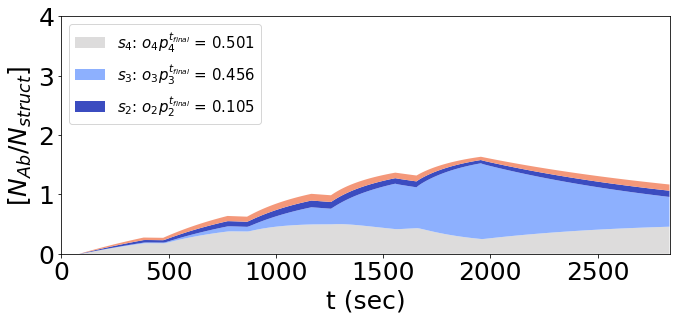

('(fit_annealing) variable parameter: ', array([ 0.06254085, 10.86562951]), 'log10 variable parameter: ', array([-1.20383624,  1.03605489]))
basinhopping step 0: f 237.505
basinhopping step 1: f 237.505 trial_f 237.505 accepted 1  lowest_f 237.505
('iggdig_28nm1', [-0.653452990606708, 1.1777032180464995])


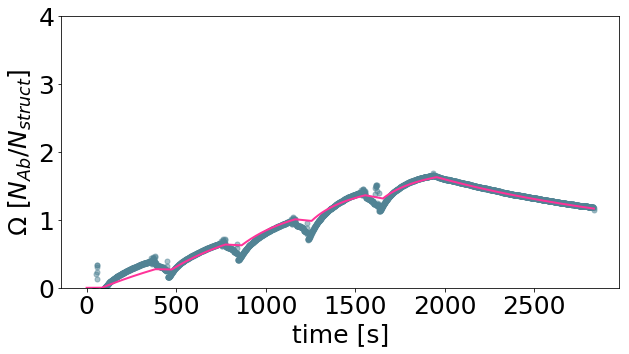

[ 0.22209921 15.05577854]


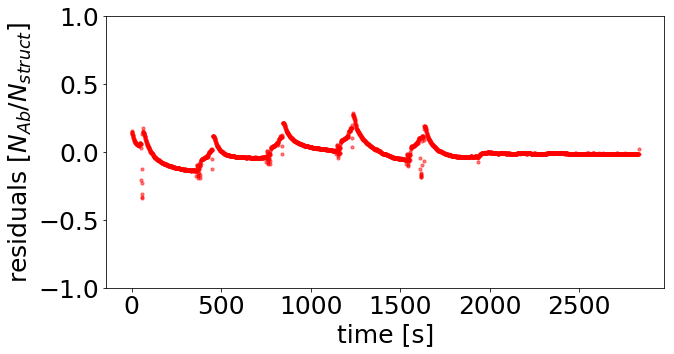

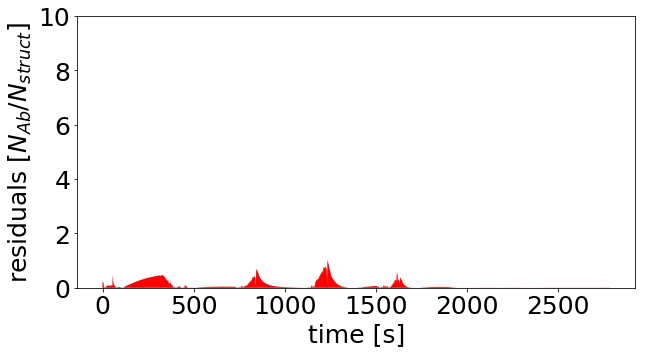

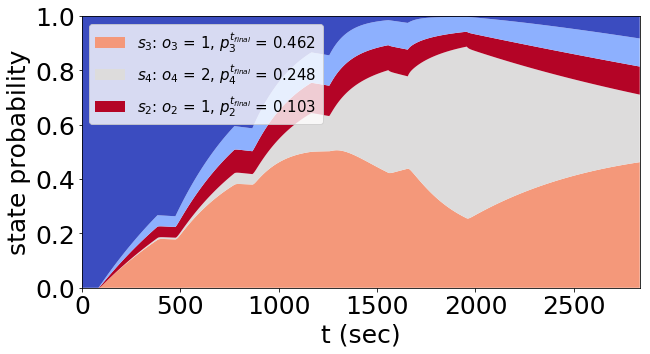

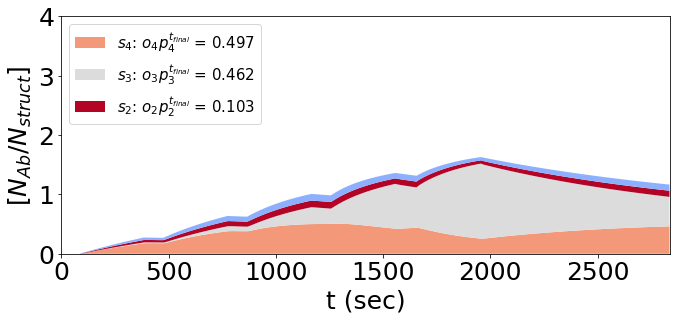

('(fit_annealing) variable parameter: ', array([ 0.06254085, 13.21820324]), 'log10 variable parameter: ', array([-1.20383624,  1.12117243]))
basinhopping step 0: f 485.521
basinhopping step 1: f 485.521 trial_f 485.521 accepted 1  lowest_f 485.521
found new global minimum on step 1 with function value 485.521
('iggdig_28nm2', [-0.344285517627099, 1.180909627840161])


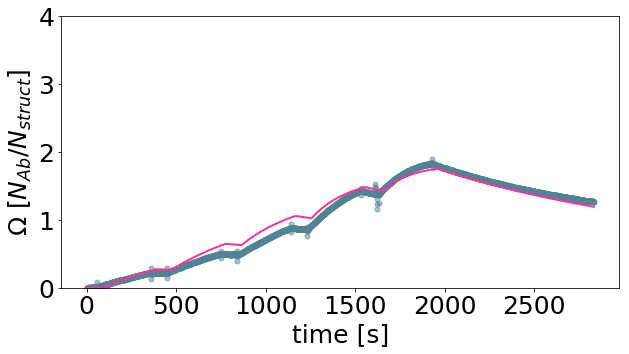

[ 0.45259993 15.16734718]


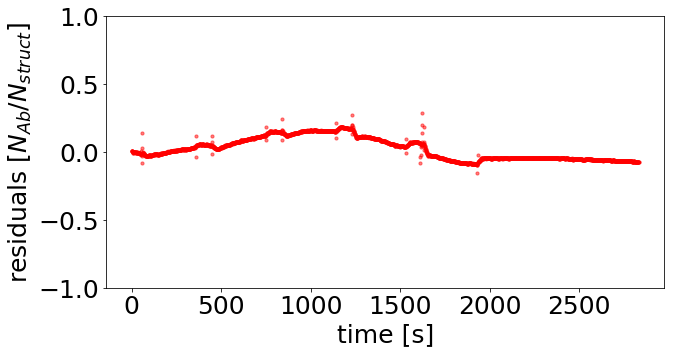

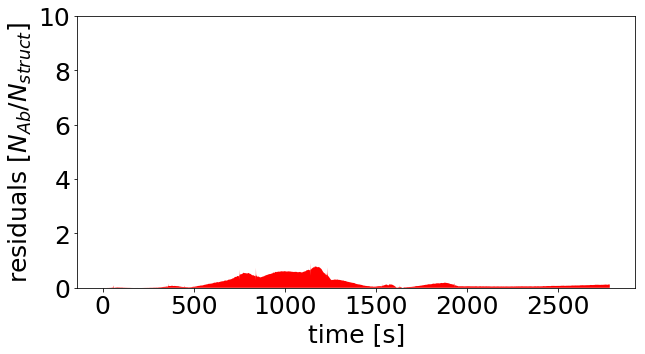

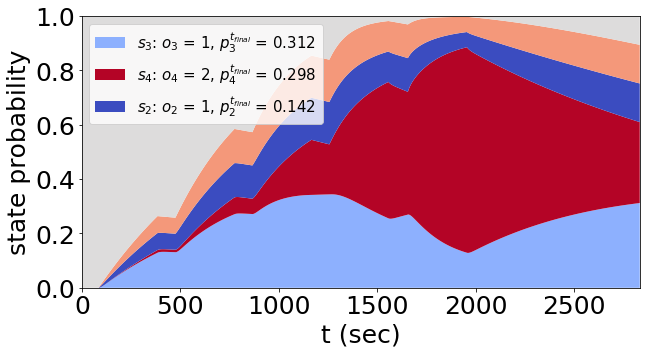

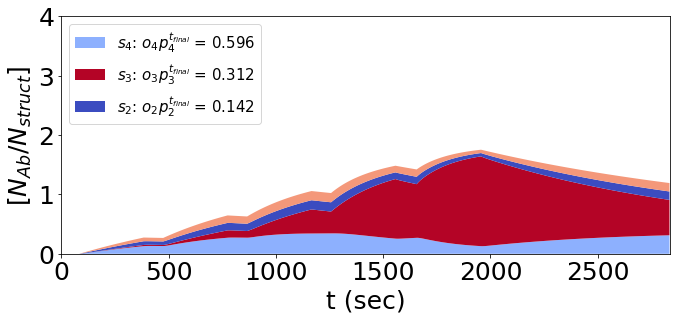

('(fit_annealing) variable parameter: ', array([ 0.06254085, 18.35840907]), 'log10 variable parameter: ', array([-1.20383624,  1.26383504]))
basinhopping step 0: f 197.86
basinhopping step 1: f 197.86 trial_f 197.86 accepted 1  lowest_f 197.86
('iggdig_42nm1', [0.03959114282777484, 1.2526719008257683])


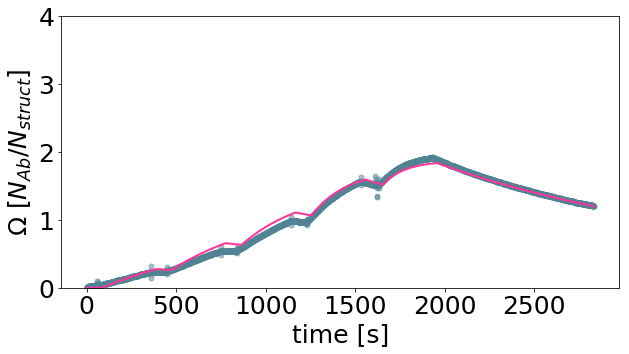

[ 1.09544643 17.89253605]


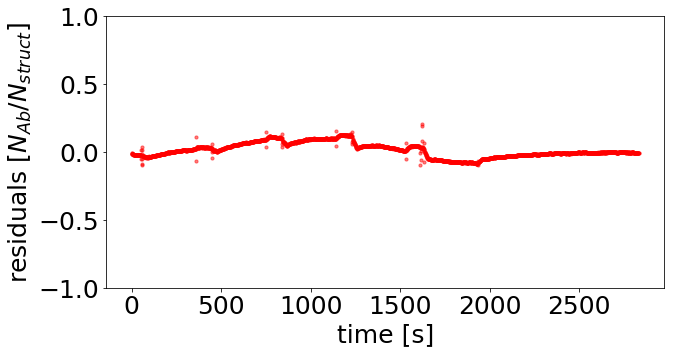

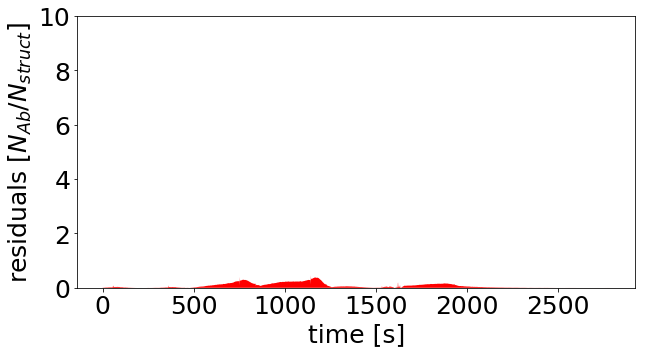

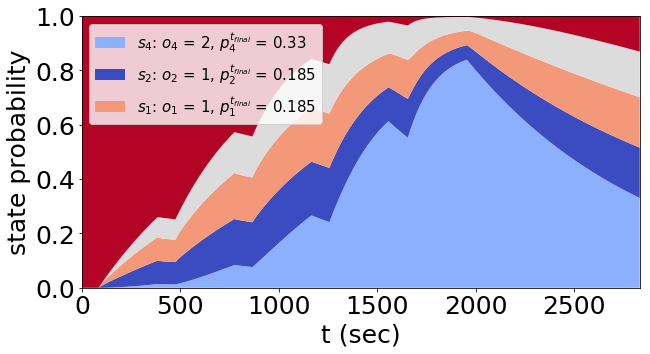

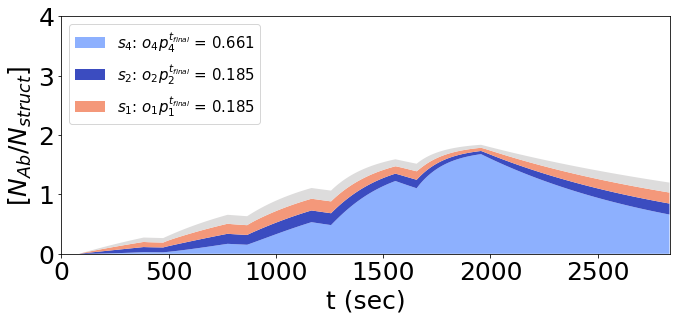

('(fit_annealing) variable parameter: ', array([ 0.06254085, 18.19044943]), 'log10 variable parameter: ', array([-1.20383624,  1.25984343]))
basinhopping step 0: f 63.1373
basinhopping step 1: f 63.1373 trial_f 63.1373 accepted 1  lowest_f 63.1373
('iggdig_42nm2', [0.27351723737299755, 1.2620160864394774])


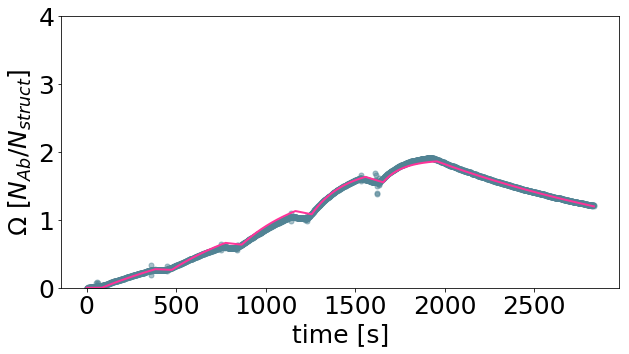

[ 1.87722893 18.28167931]


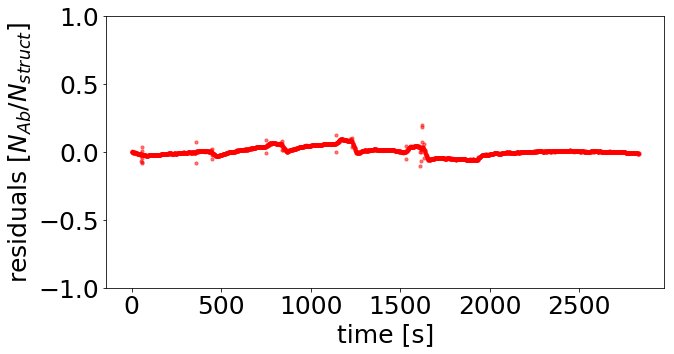

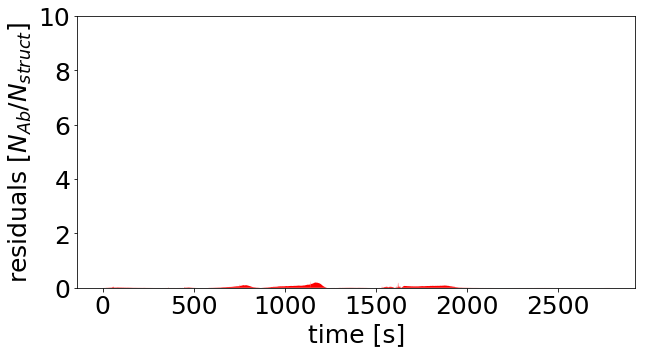

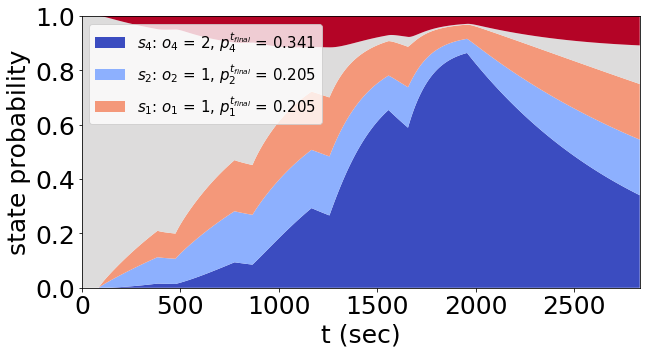

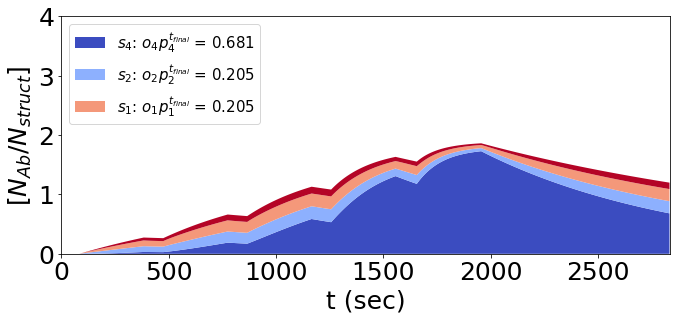

('(fit_annealing) variable parameter: ', array([ 0.06254085, 17.38612728]), 'log10 variable parameter: ', array([-1.20383624,  1.24020285]))
basinhopping step 0: f 152.891
basinhopping step 1: f 152.891 trial_f 152.891 accepted 1  lowest_f 152.891
found new global minimum on step 1 with function value 152.891
('iggdig_84nm', [0.39504849551896565, 1.3022134280938937])


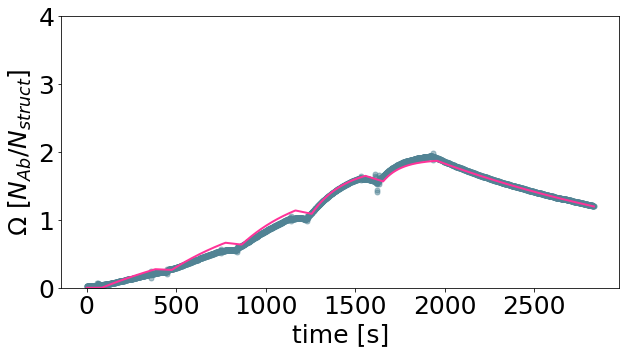

[ 2.4834104 20.0545734]


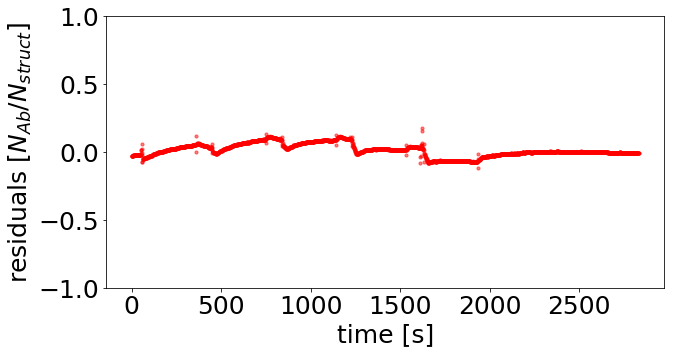

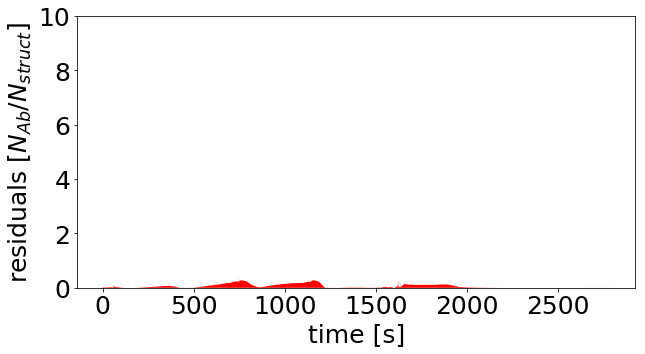

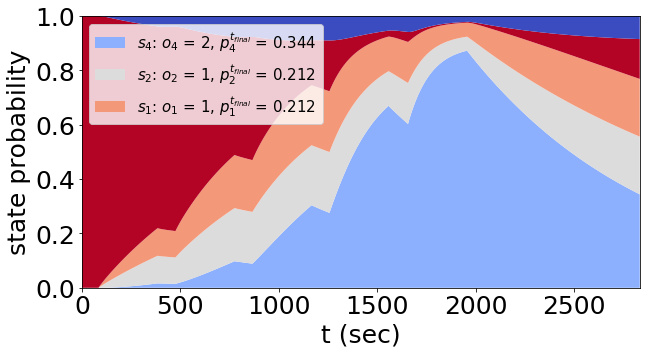

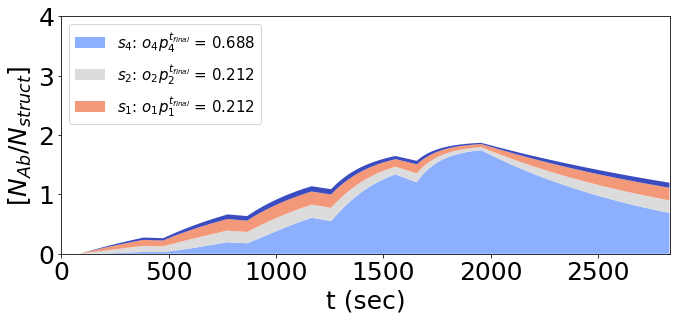

('(fit_annealing) variable parameter: ', array([ 0.06254085, 19.15641005]), 'log10 variable parameter: ', array([-1.20383624,  1.28231412]))
basinhopping step 0: f 47.2506
basinhopping step 1: f 47.2506 trial_f 47.2506 accepted 1  lowest_f 47.2506
('iggdig_99nm', [-0.07376629709212275, 1.3217865093691326])


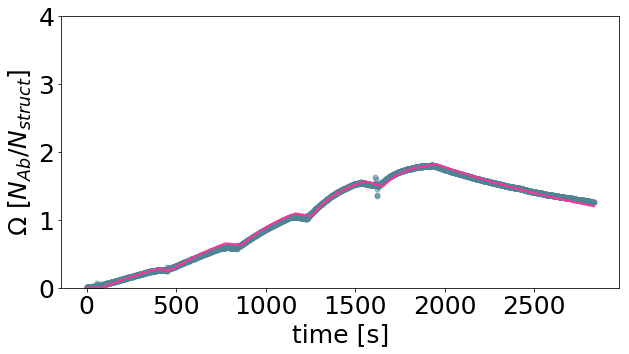

[ 0.8437887 20.9790834]


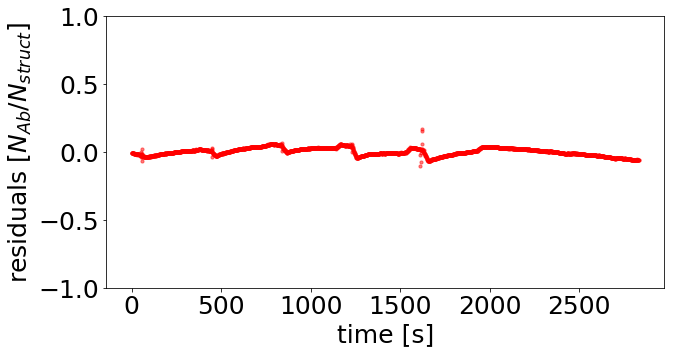

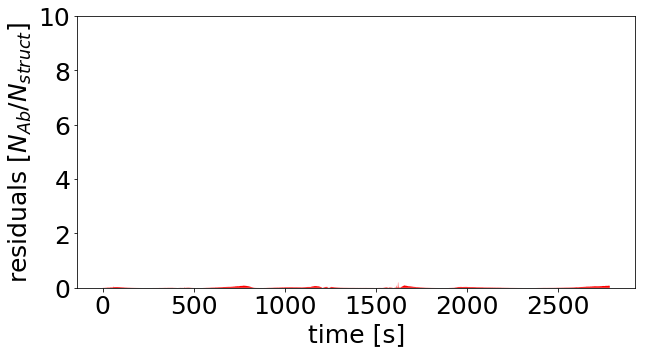

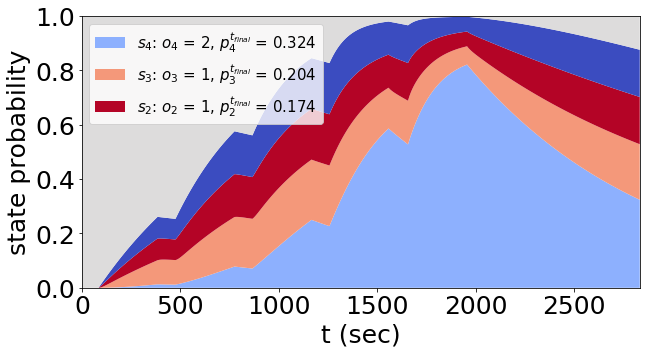

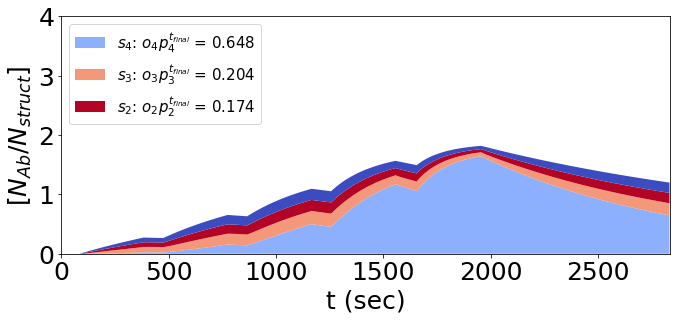

[array([-0.99645801,  1.14720233]), array([-0.90231592,  1.04622628]), array([-0.87850942,  1.20903742]), array([-1.2824979 ,  1.27011489]), array([-1.20383575,  1.25936441]), array([-1.40804104,  1.28405883]), array([-1.12650449,  1.14142197]), array([-1.06114557,  0.83631288]), array([-0.4426982 ,  1.18428699]), array([-0.37412547,  1.15650033]), array([-0.6417896 ,  1.22142955]), array([-0.65345299,  1.17770322]), array([-0.34428552,  1.18090963]), array([0.03959114, 1.2526719 ]), array([0.27351724, 1.26201609]), array([0.3950485 , 1.30221343]), array([-0.0737663 ,  1.32178651])]
xopt_compilation for monobiv, bivmono, norm_const is:
[array([-0.99645801,  1.14720233]), array([-0.90231592,  1.04622628]), array([-0.87850942,  1.20903742]), array([-1.2824979 ,  1.27011489]), array([-1.20383575,  1.25936441]), array([-1.40804104,  1.28405883]), array([-1.12650449,  1.14142197]), array([-1.06114557,  0.83631288]), array([-0.4426982 ,  1.18428699]), array([-0.37412547,  1.15650033]), array

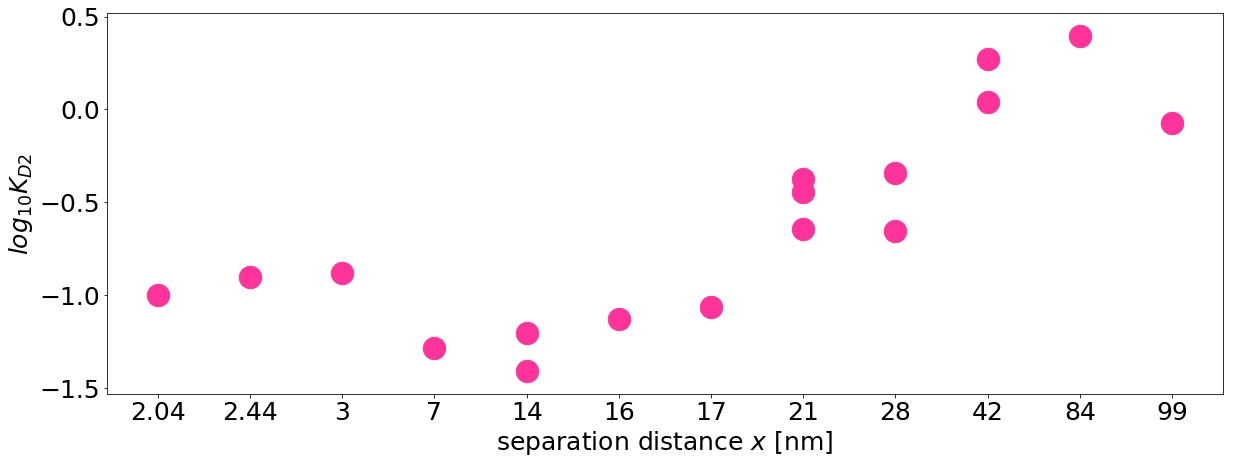

In [41]:

imp.reload(mk)

output_directory = master_name+"/spat_tol_function_fitting"
if not os.path.exists(output_directory):
            os.makedirs(output_directory)

origami_alpha = mk.Fitting(
    run_list = run_list_biv, 
    run_type = "biv", 
    mono_rates =  np.array([k_on, k_off]),
    KD_biv = KD_biv,
    concentrations = concentrations, 
    time_points = time_points, 
    scaling_constant = None, #18.31222
    output_dir = output_directory,
      struct_params = ['data_directory/august_2018_iggdig_data/',RstrRmax_slope, RstrRmax_interc],
      data_dir ='data_directory/august_2018_iggdig_data/' )
origami_alpha.set_bounds(((-3,3),(np.log10(18.31222-10),np.log10(18.31222+10))))
xopt_compilation_2 = origami_alpha.fit_annealing(fitting_number = len(run_list_biv))
print("xopt_compilation for monobiv, bivmono, norm_const is:")
print(xopt_compilation_2)


plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(20,7))
plt.scatter(run_list_biv.T[2], np.array(xopt_compilation_2).T[0], alpha = 1, s = 500,c="#ff3399")
plt.ylabel("$log_{10}K_{D2}$")
plt.xlabel("separation distance $x$ [nm]")
plt.savefig(output_directory+"/ spat_tol_function_fitting.svg")
plt.show()
plt.close()


pkl.dump([origami_alpha,  xopt_compilation_2,output_directory
         ], open(master_name+'/pickle_directory/spat_tol_function_fitting.pickle', 'wb'))

In [17]:
import pickle as pkl

origami_alpha,  xopt_compilation_2, output_directory = \
    pkl.load(open(master_name+'/pickle_directory/spat_tol_function_fitting.pickle', 'rb'))

## apparent binding constants - using analytical conversion from the markov KD2

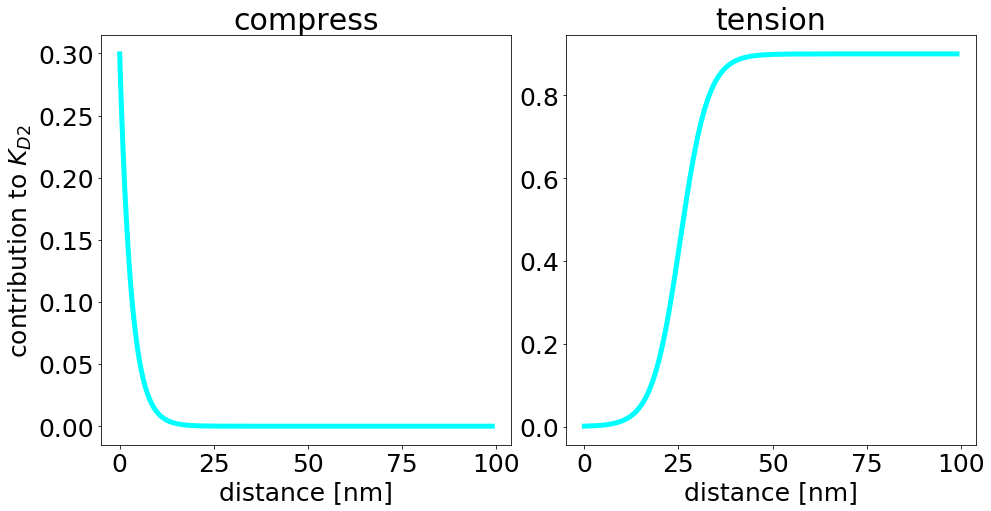

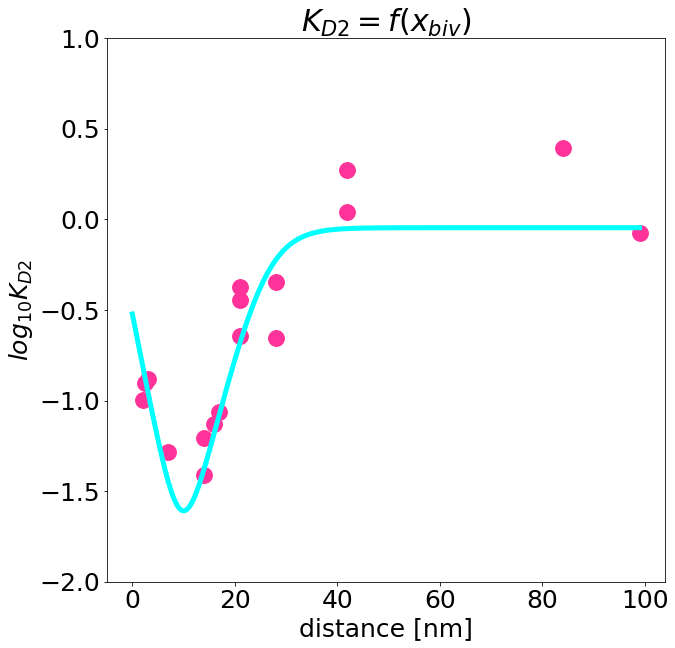

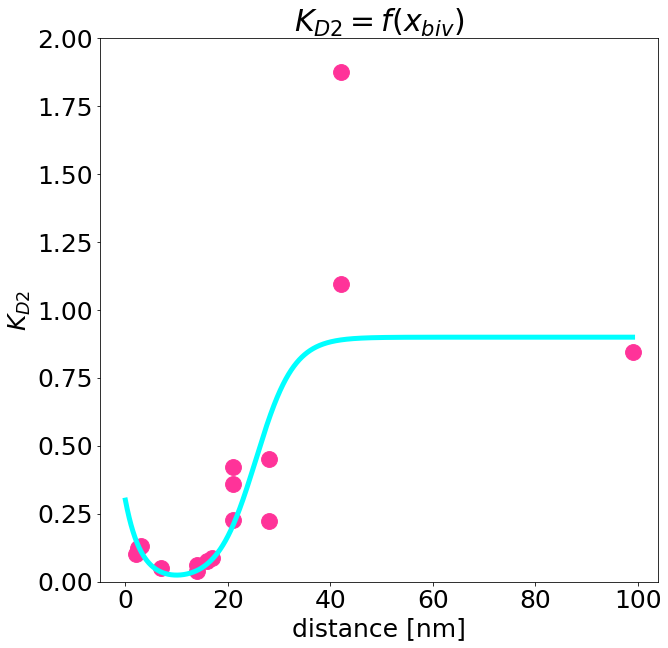

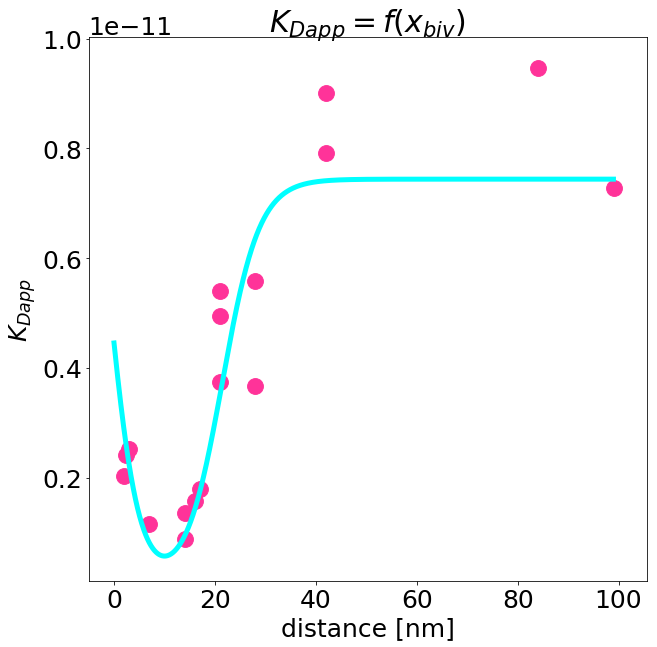

10.01
[25.4726412  0.27       1.1        0.33       0.99     ]


$${\huge K_{D2} = \frac{K_{D2}^{max}}{1+e^{-\alpha_t (x - \ell_t)}} + K_{D2}^{max}e^{-\alpha_c (x- \ell_c)}  \huge}$$

$${\huge K_{D2} = \frac{0.9}{1+e^{-0.3 (x - 25.5 nm)}} + 0.9e^{-0.3 (x- 1.1 nm)}  \huge}$$

In [20]:
import scipy.optimize as opt
# 24.31276091  0.3         0.4         0.8437887
l_t = 24
alpha_t = .3
l_c = 1
alpha_c= .3
KD2max = .9
global distances
global data
distances = (run_list_biv.T[2]).astype(np.float)[0:]
data = np.array(xopt_compilation_2).T[0][0:]


if not os.path.exists("spatol_models"):
            os.makedirs("spatol_models")

variables = [l_t,alpha_t,l_c,alpha_c, KD2max]

def spatial_tolerance(l_t,alpha_t,l_c,alpha_c,KD2max,distances):
    compression = KD2max*np.exp(-1*alpha_c*distances-l_c)
    tension = KD2max/(1+np.exp(-1*alpha_t*(distances-l_t)))
    
    combine = (compression+tension)
    return combine

def compare_alpha_to_data(variables):
    l_t = variables[0]
    alpha_t = variables[1]   
    l_c = variables[2]
    alpha_c= variables[3]
    KD2max= variables[4]
    combine = spatial_tolerance(l_t,alpha_t,l_c,alpha_c,KD2max,distances[0:])

    residuals = np.sum(np.abs(combine - np.power(10,data))/(origami_alpha.master_error[:]**0))**2
    
    return residuals
dev = 0.1
bounds = ((l_t-dev*l_t, l_t+dev*l_t),
          (alpha_t-dev*alpha_t,alpha_t+dev*alpha_t), 
          (l_c-dev*l_c,l_c+dev*l_c),
          (alpha_c-dev*alpha_c, alpha_c+dev*alpha_c), 
         (KD2max-dev*KD2max,KD2max+dev*KD2max))
xopt_dist_function = opt.minimize(compare_alpha_to_data, variables, method="Nelder-Mead")
xopt_dist_function = opt.basinhopping(compare_alpha_to_data, xopt_dist_function.x, 
                        T=.01, stepsize=100, disp=False, niter=400,interval=10,
                       minimizer_kwargs = {"bounds": bounds, "method": "L-BFGS-B"})
# variables = xopt_dist_function.x            
l_t = xopt_dist_function.x[0]
alpha_t = xopt_dist_function.x[1]
l_c = xopt_dist_function.x[2]
alpha_c= xopt_dist_function.x[3]
KD2max= variables[4]


# compression = (compa*(distances/length_scale)**compb)
# stretch = (stretcha*(distances/length_scale)**stretchb)
combine = spatial_tolerance(l_t,alpha_t,l_c,alpha_c,KD2max,distances)
residuals = np.abs(combine - data)


distances_fine = np.arange(0,99,.01)
compression_fine = KD2max*np.exp(-1*alpha_c*distances_fine-l_c)
tension_fine = KD2max/(1+np.exp(-1*alpha_t*(distances_fine-l_t)))
combine_fine = spatial_tolerance(l_t,alpha_t,l_c,alpha_c,KD2max,distances_fine)

pkl.dump([l_t,alpha_t,l_c,alpha_c,KD2max, distances, data, 
          bounds, xopt_dist_function, combine, residuals, distances_fine,
           compression_fine, tension_fine, combine_fine,
         ], open(master_name+'/pickle_directory/alpha_function_result.pickle', 'wb'))
np.savetxt("spatol_models/spatol"+master_name+".txt",variables)


KD1 = k_off/(k_on*10**9)
KD2 = combine_fine
KD2_data = np.power(10,data)
# K_Dapp = ((k_on**2)/(k_off**2.) + k_on/(k_off*np.power(10,combine_fine))  + 2.*(k_on/k_off))**-1
# K_Dapp_data = ((k_on**2)/(k_off**2.) + k_on/(k_off*np.power(10,data))  + 2.*(k_on/k_off))**-1

K_Dapp = apparent_KD(KD1*0.1,KD1, KD2)
K_Dapp_data = apparent_KD(KD1*0.1,KD1, KD2_data)

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.rcParams.update({'font.size': 25})

plt.figure(figsize=(20,7))
plt.subplot(131)
plt.tight_layout()

plt.plot(distances_fine,compression_fine,c="cyan", linewidth=5)
plt.title("compress")
plt.ylabel("contribution to $K_{D2}$")
plt.xlabel("distance [nm]")
plt.subplot(132)
plt.title("tension")
plt.plot(distances_fine,tension_fine,c="cyan", linewidth=5)
plt.xlabel("distance [nm]")

plt.savefig(output_directory+"/ compression_stretch_curves.svg")
plt.show()
plt.close()




plt.figure(figsize=(10,10))
# plt.plot(distances,combine,c="red")
plt.title("$K_{D2} = f(x_{biv})$")
plt.ylabel("$log_{10} K_{D2}$")
plt.xlabel("distance [nm]")
plt.scatter(distances,data, alpha = 1, s = 250, c = "#ff3399")
plt.plot(distances_fine,np.log10(combine_fine),c="cyan", linewidth=5)
plt.savefig(output_directory+"/ final_alpha_curve_modellogKD2.svg")
plt.ylim(-2,1)
plt.show()
plt.close()

plt.figure(figsize=(10,10))
# plt.plot(distances,combine,c="red")
plt.title("$K_{D2} = f(x_{biv})$")
plt.ylabel("$K_{D2}$")
plt.xlabel("distance [nm]")
plt.scatter(distances,np.power(10,data), alpha = 1, s = 250, c = "#ff3399")
plt.plot(distances_fine,combine_fine,c="cyan", linewidth=5)
plt.ylim(0,2)
plt.savefig(output_directory+"/ final_alpha_curve_modelKD2.svg")
plt.show()
plt.close()

plt.figure(figsize=(10,10))
# plt.plot(distances,combine,c="red")
plt.title("$K_{Dapp} = f(x_{biv})$")
plt.ylabel("$K_{Dapp}$")
plt.xlabel("distance [nm]")
plt.plot(distances_fine,K_Dapp,c="cyan", linewidth=5)
plt.scatter(distances,K_Dapp_data, alpha = 1, s = 250, c = "#ff3399")
plt.savefig(output_directory+"/ final_alpha_curve_modelapp.svg")
plt.show()
plt.close()


# plt.figure(figsize=(20,7))
# plt.ylabel("residual $log_{10} K_{D2}$")
# plt.xlabel("distance [nm]")
# plt.stackplot(distances,residuals, alpha = 1, colors = ["r"])
# plt.savefig(output_directory+"/ alpha_curve_model_.svg")
# plt.show()
# plt.close()
print(distances_fine[np.argmin(combine_fine)])
print(xopt_dist_function.x )
"+str(np.round(compa,1))+"
# display(Markdown("$${\huge K_{D2} = f(x) = \\left( \\frac{x}{\\ell_{stretch}} \\right)^\\alpha - \\left( \\frac{x}{\\ell_{compress}} \\right)^\\beta = \\left( \\frac{x}{"+str(np.round(l_t,1))+"} \\right)^{"+str(np.round(alpha_t,1))+"} - \\left( \\frac{x}{"+str(np.round(l_c,1))+"} \\right)^{"+str(np.round(alpha_c,1))+"}  \huge}$$"))
display(Markdown("$${\huge K_{D2} = \\frac{K_{D2}^{max}}{1+e^{-\\alpha_t (x - \\ell_t)}} + K_{D2}^{max}e^{-\\alpha_c (x- \\ell_c)}  \huge}$$"))
display(Markdown("$${\huge K_{D2} = \\frac{"+str(np.round(KD2max,1))+"}{1+e^{-"+str(np.round(alpha_t,1))+" (x - "+str(np.round(l_t,1))+" nm)}} + "+str(np.round(KD2max,1))+"e^{-"+str(np.round(alpha_c,1))+" (x- "+str(np.round(l_c,1))+" nm)}  \huge}$$"))

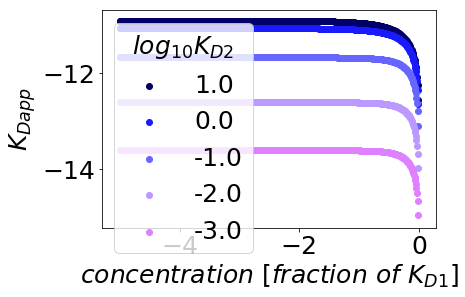

In [21]:
KD1 = k_off/(k_on*10**9)
KD2 = distances_fine[np.argmin(combine_fine)]
# K_Dapp = ((k_on**2)/(k_off**2.) + k_on/(k_off*np.power(10,combine_fine))  + 2.*(k_on/k_off))**-1
# K_Dapp_data = ((k_on**2)/(k_off**2.) + k_on/(k_off*np.power(10,data))  + 2.*(k_on/k_off))**-1
fractionofKD1 = np.power(10,np.arange(-5,0,.01))
concentrations = fractionofKD1*KD1

plt.scatter(np.log10(fractionofKD1),np.log10(apparent_KD(concentrations,KD1, KD2)),c="#000066")
plt.scatter(np.log10(fractionofKD1),np.log10(apparent_KD(concentrations,KD1, KD2*.1)),c="#1a1aff")
plt.scatter(np.log10(fractionofKD1),np.log10(apparent_KD(concentrations,KD1, KD2*.01)),c="#6666ff")
plt.scatter(np.log10(fractionofKD1),np.log10(apparent_KD(concentrations,KD1, KD2*.001)),c="#bb99ff")
plt.scatter(np.log10(fractionofKD1),np.log10(apparent_KD(concentrations,KD1, KD2*.0001)),c="#df80ff")
plt.legend([np.round(np.log10(KD2),2), np.round(np.log10(KD2*.1),2), np.round(np.log10(KD2*.01),2), np.round(np.log10(KD2*.001),2), np.round(np.log10(KD2*.0001),2)],title="$log_{10}K_{D2}$")
# plt.ylim(-12,-7)
# plt.xlim(-12,-7)
plt.xlabel("$concentration \ [fraction \ of \ K_{D1}]$")
plt.ylabel("$K_{Dapp}$")
plt.savefig(output_directory+"/ KD1_Kapp_relationship.svg")
plt.show()
plt.close()
